# A Deep Learning Approach to Predict Home Win-Loss Major League Baseball Season Games
IFN703 - Advanced Project

**Author:** *Wei Quek* - **Student Number:** *n10503196*

## Abstract
It is fair to say that the Major League Baseball (MLB) has entered into a new phase ever since the book “Moneyball: The Art of Winning an Unfair Game” was published in 2003 [1]. Nowadays, it is no longer uncommon but rather a necessity for a baseball team to hire a group of full-time data analysts, also known as “Sabermetricians”, as part of the front office team. They analyse game statistics and players performance; and use the analysis result to augment game decision making that give the team a winning edge. With an average MLB team worth $1.78 billion in 2019 [2], predicting the winner of an MLB season is therefore important to team owners to ensure they are getting value for their investment money. By using publicly available MLB data, this study aims to explore the suitability of implementing deep-learning-based machine learning model to predict MLB game outcome, and hopefully to provide an insight to teams on area where they need to improve on in order to secure more wins in an MLB season.  

## Main Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pca

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import math
from datetime import datetime                    # used for date conversion

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# update for tensorflow
# keras / deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout

# callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

import seaborn as sns
#sns.set_style('dark')
#sns.set(style="ticks", context="talk")

import pylab as pl
from pylab import savefig

plt.style.use('seaborn-deep')
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.utils import class_weight

# Important for feature transformation
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from pca import pca as prin_ca

## The Dataset

Game data are downloaded from Retrosheet [11]. The dataset consists of all MLB game data for each season, with records going as far back as the late 1800s. For the purpose of this study, game data for season between 2006 and 2019 will only be considered. There are over 2,400 games played per MLB season, this would produce about 33,600 rows of data for the selected period.

#### Retrosheet Data Notice:
Recipients of Retrosheet data are free to make any desired use of
the information, including (but not limited to) selling it,
giving it away, or producing a commercial product based upon the
data.  Retrosheet has one requirement for any such transfer of
data or product development, which is that the following
statement must appear prominently:

     The information used here was obtained free of
     charge from and is copyrighted by Retrosheet.  Interested
     parties may contact Retrosheet at "www.retrosheet.org".
     
Retrosheet makes no guarantees of accuracy for the information
that is supplied. Much effort is expended to make our website
as correct as possible, but Retrosheet shall not be held
responsible for any consequences arising from the use the
material presented here. All information is subject to corrections
as additional data are received. We are grateful to anyone who
discovers discrepancies and we appreciate learning of the details.


### Defining column names
Data Dictionary to Retrosheet Game Logs:

https://www.retrosheet.org/gamelogs/glfields.txt

In [ ]:
########################################################
# Guide to Retrosheet Game Logs
# https://www.retrosheet.org/gamelogs/glfields.txt
########################################################

gamelog_columns = [
    'date', 'game_num', 'day_of_week', 'visiting_team',
    'visiting_team_league', 'visiting_team_game_num', 'home_team',
    'home_team_league', 'home_team_game_num', 'visiting_score',
    'home_score', 'num_outs', 'day_night', 'completion_info',
    'forfeit_info', 'protest_info', 'park_id', 'attendance',
    'time_of_game_minutes', 'visiting_line_score',
    'home_line_score', 'visiting_abs', 'visiting_hits',
    'visiting_doubles', 'visiting_triples', 'visiting_homeruns',
    'visiting_rbi', 'visiting_sac_hits', 'visiting_sac_flies',
    'visiting_hbp', 'visiting_bb', 'visiting_iw', 'visiting_k',
    'visiting_sb', 'visiting_cs', 'visiting_gdp', 'visiting_ci',
    'visiting_lob', 'visiting_pitchers_used',
    'visiting_individual_er', 'visiting_er', 'visiting_wp',
    'visiting_balks', 'visiting_po', 'visiting_assists',
    'visiting_errors', 'visiting_pb', 'visiting_dp',
    'visiting_tp', 'home_abs', 'home_hits', 'home_doubles',
    'home_triples', 'home_homeruns', 'home_rbi',
    'home_sac_hits', 'home_sac_flies', 'home_hbp', 'home_bb',
    'home_iw', 'home_k', 'home_sb', 'home_cs', 'home_gdp',
    'home_ci', 'home_lob', 'home_pitchers_used',
    'home_individual_er', 'home_er', 'home_wp', 'home_balks',
    'home_po', 'home_assists', 'home_errors', 'home_pb',
    'home_dp', 'home_tp', 'ump_home_id', 'ump_home_name',
    'ump_first_id', 'ump_first_name', 'ump_second_id',
    'ump_second_name', 'ump_third_id', 'ump_third_name',
    'ump_lf_id', 'ump_lf_name', 'ump_rf_id', 'ump_rf_name',
    'visiting_manager_id', 'visiting_manager_name',
    'home_manager_id', 'home_manager_name',
    'winning_pitcher_id', 'winning_pitcher_name',
    'losing_pitcher_id', 'losing_pitcher_name',
    'save_pitcher_id', 'save_pitcher_name',
    'game_winning_rbi_id', 'game_winning_rbi_name',
    'visiting_starting_pitcher_id',
    'visiting_starting_pitcher_name',
    'home_starting_pitcher_id', 'home_starting_pitcher_name',
    'visiting_1_id', 'visiting_1_name', 'visiting_1_pos',
    'visiting_2_id', 'visiting_2_name', 'visiting_2_pos',
    'visiting_2_id.1', 'visiting_3_name', 'visiting_3_pos',
    'visiting_4_id', 'visiting_4_name', 'visiting_4_pos',
    'visiting_5_id', 'visiting_5_name', 'visiting_5_pos',
    'visiting_6_id', 'visiting_6_name', 'visiting_6_pos',
    'visiting_7_id', 'visiting_7_name', 'visiting_7_pos',
    'visiting_8_id', 'visiting_8_name', 'visiting_8_pos',
    'visiting_9_id', 'visiting_9_name', 'visiting_9_pos',
    'home_1_id', 'home_1_name', 'home_1_pos', 'home_2_id',
    'home_2_name', 'home_2_pos', 'home_3_id', 'home_3_name',
    'home_3_pos', 'home_4_id', 'home_4_name', 'home_4_pos',
    'home_5_id', 'home_5_name', 'home_5_pos', 'home_6_id',
    'home_6_name', 'home_6_pos', 'home_7_id', 'home_7_name',
    'home_7_pos', 'home_8_id', 'home_8_name', 'home_8_pos',
    'home_9_id', 'home_9_name', 'home_9_pos', 'misc',
    'acquisition_info'
]

### Loading Data

In [ ]:
# specify the location and the filename of the dataset
path = '/content/drive/My Drive/Education/QUT - Masters of Data Analytics/IFN703/Project - Baseball'
for x in range(2006, 2020):
    filename = path + '/GL%d.TXT' % x
    
    # load the .csv dataset using the function read_csv, which is part of the pandas library
    data = pd.read_csv(filename, header=None)
    data.columns = gamelog_columns
    
    if x > 2006:
        data_game = pd.concat([data_game, data], ignore_index=True, sort=False)
    else:
        data_game = data
               
# We can already have some general information about our dataset by getting 
# the number of rows and columns of the data. For this, we use the *shape* method from Python:
dimensions = data_game.shape

print( 'General size of the dataset: ' + str( dimensions ))

# and we can extract the number of rows and the number of columns by doing:
print('The dataset has ' + str( dimensions[0] ) + ' rows and ' + str( dimensions[1] ) + ' columns.' )

General size of the dataset: (34015, 161)
The dataset has 34015 rows and 161 columns.


#### Looking at a sample of the data

In [ ]:
data_game.tail(5)

,date,game_num,day_of_week,visiting_team,visiting_team_league,visiting_team_game_num,home_team,home_team_league,home_team_game_num,visiting_score,home_score,num_outs,day_night,completion_info,forfeit_info,protest_info,park_id,attendance,time_of_game_minutes,visiting_line_score,home_line_score,visiting_abs,visiting_hits,visiting_doubles,visiting_triples,visiting_homeruns,visiting_rbi,visiting_sac_hits,visiting_sac_flies,visiting_hbp,visiting_bb,visiting_iw,visiting_k,visiting_sb,visiting_cs,visiting_gdp,visiting_ci,visiting_lob,visiting_pitchers_used,visiting_individual_er,...,visiting_6_name,visiting_6_pos,visiting_7_id,visiting_7_name,visiting_7_pos,visiting_8_id,visiting_8_name,visiting_8_pos,visiting_9_id,visiting_9_name,visiting_9_pos,home_1_id,home_1_name,home_1_pos,home_2_id,home_2_name,home_2_pos,home_3_id,home_3_name,home_3_pos,home_4_id,home_4_name,home_4_pos,home_5_id,home_5_name,home_5_pos,home_6_id,home_6_name,home_6_pos,home_7_id,home_7_name,home_7_pos,home_8_id,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,misc,acquisition_info
34010,20190929,0,Sun,DET,AL,161,CHA,AL,161,3,5,51,D,NaN,NaN,NaN,CHI12,19534.0,157,101000001,10000400x,31,7,1,0,2,3,0,0,0,3,0,8,1,0,2,0,4,4,4,...,Christin Stewart,7,demet001,Travis Demeritte,9,greig001,Grayson Greiner,2,castw003,Willi Castro,6,sancc001,Yolmer Sanchez,4,andet001,Tim Anderson,6,abrej003,Jose Abreu,3,moncy001,Yoan Moncada,5,jimee001,Eloy Jimenez,7,collz001,Zack Collins,2,castw002,Welington Castillo,10,palkd001,Daniel Palka,9,engea001,Adam Engel,8,NaN,Y
34011,20190929,0,Sun,MIN,AL,162,KCA,AL,162,4,5,52,D,NaN,NaN,NaN,KAN06,17875.0,160,300010000,100200011,32,6,1,0,3,4,0,0,1,0,0,8,0,0,0,0,2,6,5,...,Jonathan Schoop,4,castj006,Jason Castro,2,torrr001,Ronald Torreyes,5,milli001,Ian Miller,9,merrw001,Whit Merrifield,4,solej001,Jorge Soler,10,dozih001,Hunter Dozier,5,gorda001,Alex Gordon,7,mcbrr001,Ryan McBroom,9,cuthc001,Cheslor Cuthbert,3,mejie001,Erick Mejia,8,arteh001,Humberto Arteaga,6,dinin001,Nick Dini,2,NaN,Y
34012,20190929,0,Sun,OAK,AL,162,SEA,AL,162,1,3,51,D,NaN,NaN,NaN,SEA03,16819.0,172,000000001,20001000x,30,3,1,0,0,1,0,0,0,4,0,8,1,0,0,0,6,5,3,...,Josh Phegley,2,neuss001,Sheldon Neuse,5,barrf001,Franklin Barreto,4,bolts001,Skye Bolt,8,longs001,Shed Long,7,crawj002,J.P. Crawford,6,nolaa002,Austin Nola,3,seagk001,Kyle Seager,5,lewik001,Kyle Lewis,9,narvo001,Omar Narvaez,2,voged001,Daniel Vogelbach,10,smitm007,Mallex Smith,8,gordd002,Dee Gordon,4,NaN,Y
34013,20190929,0,Sun,NYA,AL,162,TEX,AL,162,1,6,51,D,NaN,NaN,NaN,ARL02,47144.0,167,001000000,10202100x,30,3,0,0,1,1,0,0,0,1,0,13,0,0,0,0,3,6,4,...,Gary Sanchez,2,gregd001,Didi Gregorius,6,urshg001,Giovanny Urshela,5,maybc001,Cameron Maybin,7,choos001,Shin-Soo Choo,10,andre001,Elvis Andrus,6,calhw001,Willie Calhoun,7,santd001,Danny Santana,9,odorr001,Rougned Odor,4,solan001,Nick Solak,5,guzmr001,Ronald Guzman,3,deshd002,Delino DeShields,8,trevj001,Jose Trevino,2,NaN,Y
34014,20190929,0,Sun,TBA,AL,162,TOR,AL,162,3,8,51,D,NaN,NaN,NaN,TOR02,25738.0,187,000100020,20030120x,36,9,3,0,1,3,0,0,0,1,0,10,1,0,0,0,7,6,8,...,Daniel Robertson,4,duffm002,Matt Duffy,5,zunim001,Mike Zunino,2,adamw002,Willy Adames,6,hernt002,Teoscar Hernandez,7,biggc002,Cavan Biggio,4,gricr001,Randal Grichuk,9,tellr001,Rowdy Tellez,10,smoaj001,Justin Smoak,3,valeb001,Breyvic Valera,5,urenr001,Richard Urena,6,davij007,Jonathan Davis,8,maill001,Luke Maile,2,NaN,Y


#### Check for duplication

In [ ]:
# Do we have duplicate data?
data_game.duplicated(keep=False).value_counts()

False    34015
dtype: int64

#### Check for incomplete data
There is a column `[acquisition_info]` containing acquisition information: 

*   "Y" -- we have the complete game
*   "N" -- we don't have any portion of the game
*   "D" -- the game was derived from box score and game story
*   "P" -- we have some portion of the game.  We may be missing           innings at the beginning, middle and end of the game.

In [ ]:
# Do we have incomplete data? 
# 161 Acquisition information:
#     "Y" -- we have the complete game
#     "N" -- we don't have any portion of the game
#     "D" -- the game was derived from box score and game story
#     "P" -- we have some portion of the game.  We may be missing
#            innings at the beginning, middle and end of the game.
data_game['acquisition_info'].value_counts()

Y    34015
Name: acquisition_info, dtype: int64

#### Getting dataframe information

In [ ]:
# Getting dataframe information
print(data_game.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34015 entries, 0 to 34014
Columns: 161 entries, date to acquisition_info
dtypes: float64(2), int64(82), object(77)
memory usage: 41.8+ MB
None


In [ ]:
pd.DataFrame(data_game.describe())

,date,game_num,visiting_team_game_num,home_team_game_num,visiting_score,home_score,num_outs,forfeit_info,attendance,time_of_game_minutes,visiting_abs,visiting_hits,visiting_doubles,visiting_triples,visiting_homeruns,visiting_rbi,visiting_sac_hits,visiting_sac_flies,visiting_hbp,visiting_bb,visiting_iw,visiting_k,visiting_sb,visiting_cs,visiting_gdp,visiting_ci,visiting_lob,visiting_pitchers_used,visiting_individual_er,visiting_er,visiting_wp,visiting_balks,visiting_po,visiting_assists,visiting_errors,visiting_pb,visiting_dp,visiting_tp,home_abs,home_hits,...,home_sac_hits,home_sac_flies,home_hbp,home_bb,home_iw,home_k,home_sb,home_cs,home_gdp,home_ci,home_lob,home_pitchers_used,home_individual_er,home_er,home_wp,home_balks,home_po,home_assists,home_errors,home_pb,home_dp,home_tp,visiting_1_pos,visiting_2_pos,visiting_3_pos,visiting_4_pos,visiting_5_pos,visiting_6_pos,visiting_7_pos,visiting_8_pos,visiting_9_pos,home_1_pos,home_2_pos,home_3_pos,home_4_pos,home_5_pos,home_6_pos,home_7_pos,home_8_pos,home_9_pos
count,3.401500e+04,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,0.0,34014.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,...,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.00000,34015.000000,34015.00000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.00000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000,34015.000000
mean,2.012567e+07,0.031574,81.487844,81.488843,4.411377,4.559488,53.592680,NaN,30414.478715,180.767573,34.953403,8.838130,1.768661,0.166809,1.056122,4.203792,0.268881,0.258298,0.345612,3.115331,0.216052,7.819962,0.570748,0.226547,0.782890,0.006144,6.984860,3.948199,4.213259,4.205351,0.349434,0.030634,26.041247,9.599383,0.604674,0.068293,0.879906,0.000647,33.380538,8.735646,...,0.275496,0.266794,0.346465,3.223607,0.232633,7.180832,0.567015,0.203763,0.745465,0.006350,6.898368,4.131030,4.07335,4.066147,0.33888,0.030957,27.551433,10.119829,0.593268,0.068793,0.917360,0.001029,6.769161,6.025665,6.04057,5.851977,5.872527,5.700779,5.251859,4.690401,3.147170,6.769043,6.025695,6.043157,5.860032,5.874526,5.699280,5.282052,4.633779,3.162546
std,4.030969e+04,0.227219,46.756784,46.760664,3.160309,3.093843,5.103053,NaN,10645.501632,28.182915,4.419515,3.566143,1.404394,0.419981,1.101027,3.063782,0.535197,0.516802,0.607885,2.047092,0.498402,2.970996,0.883452,0.472823,0.860528,0.079266,2.670797,1.379451,2.957347,2.951165,0.621081,0.178691,2.898395,3.158444,0.804363,0.269604,0.910088,0.025424,4.209248,3.364776,...,0.537294,0.521368,0.601490,2.046968,0.520305,2.936595,0.882978,0.450747,0.843631,0.081626,2.645827,1.382115,3.00514,3.000065,0.61212,0.177893,2.381956,3.219136,0.807478,0.268986,0.922668,0.032061,1.761283,2.003250,2.52072,2.719938,2.653337,2.532511,2.465791,2.465166,2.652971,1.776012,1.995980,2.517631,2.714641,2.651659,2.529528,2.472201,2.459198,2.657716
min,2.006040e+07,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,NaN,0.000000,75.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

### Data Preparation and Cleansing
Several steps are undertaken for cleaning and preparing the dataset for model fitting

*   Drop unused columns as there are mainly descriptive attributes
*   Convert date column to the appropriate format
*   Add new columns: Season and home wins
*   Exception: Replace FLO with MIA. 
History: The Miami Marlins are a Major League Baseball team that currently plays in the city of Miami. Founded in 1991 as the Florida Marlins, the Marlins began play in 1993 in the suburb of Miami Gardens, and moved to the city in 2012, becoming the Miami Marlins at that time. More: https://en.wikipedia.org/wiki/History_of_the_Miami_Marlins

 




In [ ]:
# Remove unwanted columns
data_game.drop(data_game.iloc[:,77:161], inplace =True, axis=1)

# Remove info columns
data_game.drop(data_game.iloc[:,13:15], inplace =True, axis=1)

# Convert date 
data_game['date'] = pd.to_datetime(data_game['date'],format='%Y%m%d')

# Season
data_game['season']=pd.DatetimeIndex(data_game['date']).year

# Home Win
data_game['home_wins'] = 0
data_game.loc[data_game['home_score'] > data_game['visiting_score'], 'home_wins'] = 1

# Exception: Replace FLO with MIA
data_game.loc[data_game['visiting_team'] == 'FLO', 'visiting_team'] = 'MIA'
data_game.loc[data_game['home_team'] == 'FLO', 'home_team'] = 'MIA'

## Exploring the Dataset


### Examine the number of games per seasons

Do we have the same number of games played per season?

<function matplotlib.pyplot.show>

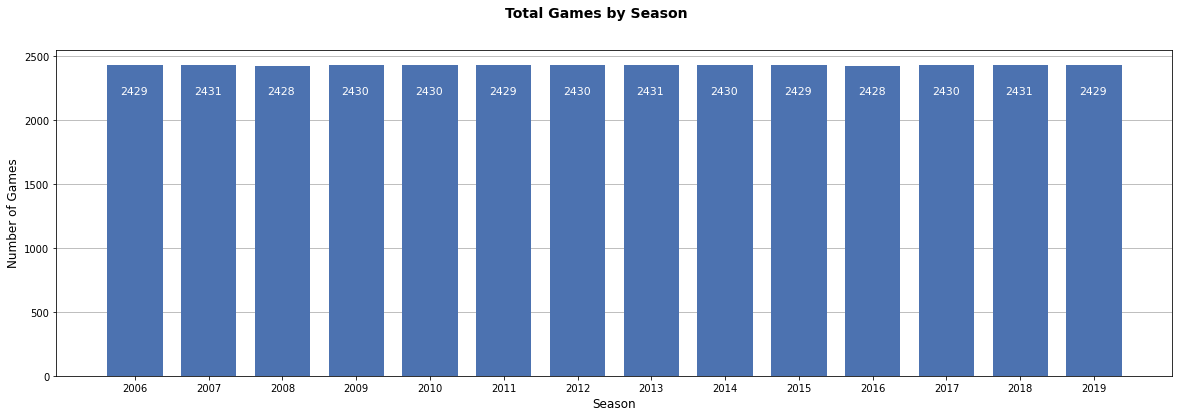

In [ ]:
d_total_games = data_game.groupby(['season']).agg(['count'])['home_wins']

fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,1,1) 
ax.bar(d_total_games.index, d_total_games['count'], 0.75, zorder=3)
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Number of Games', fontsize = 12)
for j in d_total_games.index:
    ax.text(-0.2+j, 2200, d_total_games['count'][j] ,size=11, rotation=0, color='white')

min_x = d_total_games.index.min()
max_x = d_total_games.index.max()

ax.grid(axis='y', zorder=0)
plt.xticks(np.arange(min_x,max_x+1,1))
plt.suptitle("Total Games by Season",
                 fontsize=14, fontweight='bold')
plt.show

### Checking Class Balance

Examining imbalances in the class labels. A classifier needs to have the same amount of instances for each class, otherwise it will be biased towards one of them.

There is an advantage to home team with slightly higher chance of winning across all seasons.

<function matplotlib.pyplot.show>

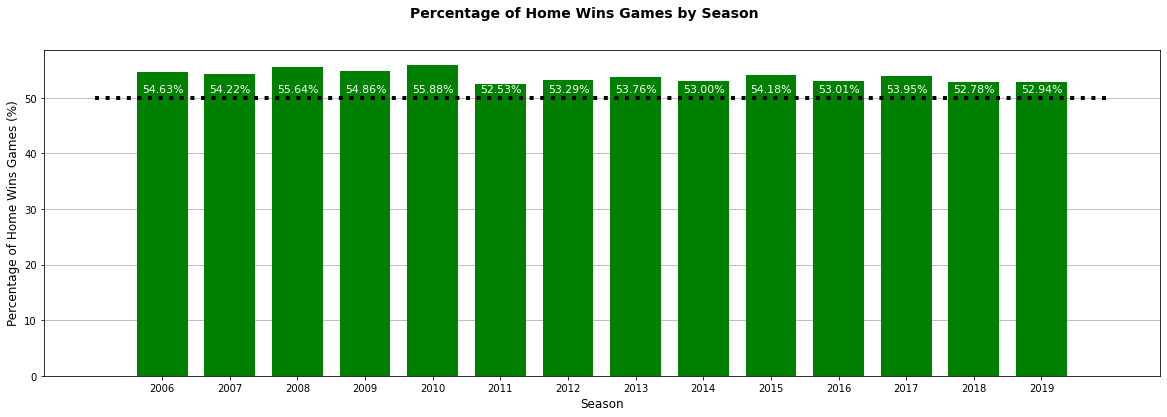

In [ ]:
d_home_wins = data_game.groupby(["season"]).agg(['mean'])['home_wins']

fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1,1,1) 
ax.bar(d_home_wins.index, d_home_wins['mean']*100, 0.75, zorder=3, color='green')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Percentage of Home Wins Games (%)', fontsize = 12)
for j in d_home_wins.index:
    ax.text(-0.3+j, 51, format(d_home_wins['mean'][j], '.2%'),size=11, rotation=0, color='white')

min_x = d_home_wins.index.min()
max_x = d_home_wins.index.max()

ax.hlines(y=50, xmin=min_x-1, xmax=max_x+1, ls=':', lw=4, color='black', zorder=4)
ax.grid(axis='y', zorder=0)
plt.xticks(np.arange(min_x,max_x+1,1))
plt.suptitle("Percentage of Home Wins Games by Season",
                 fontsize=14, fontweight='bold')
plt.show

### What are the percentage of home wins between day and night?

Generally home team has a winning advantage of games played during the day across all season, exception season 2006 (53.38% vs 55.23%), 2013 (52.93% vs 54.24%) and 2015 (53.83% vs 54.35%). This is despite that two-third of the games are played at night.

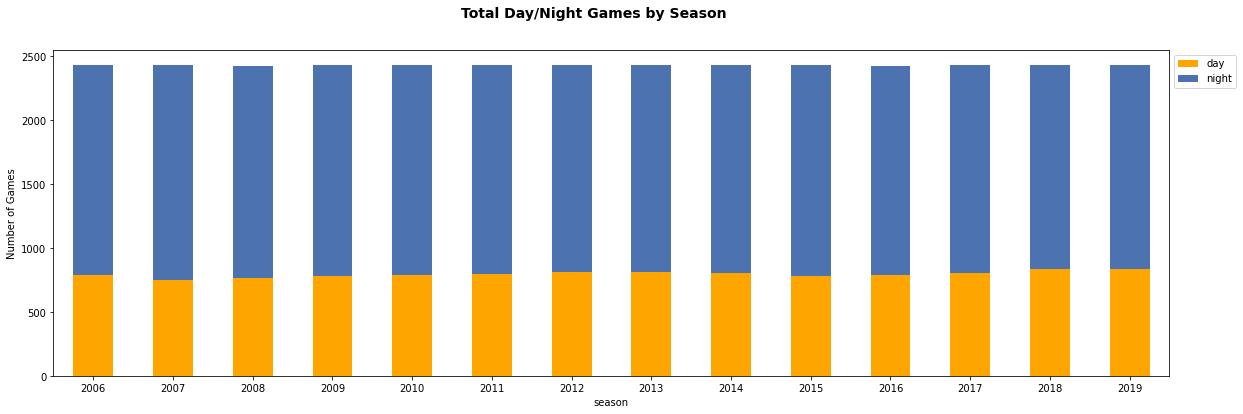

In [ ]:
d_day_home_wins = data_game[(data_game['day_night'] == 'D')].groupby(["season"]).agg(['count'])['home_wins']
d_night_home_wins = data_game[(data_game['day_night'] == 'N')].groupby(["season"]).agg(['count'])['home_wins']
d_day_night_home_wins = pd.concat([d_day_home_wins,d_night_home_wins],axis=1)
d_day_night_home_wins.columns = ['day','night']

ax = d_day_night_home_wins.plot.bar(stacked=True, figsize=(20, 6), color=['orange','C0'], rot=0)
ax.set_ylabel('Number of Games')

plt.legend(title='', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.suptitle('Total Day/Night Games by Season', fontsize=14, fontweight='bold')
plt.show()

<function matplotlib.pyplot.show>

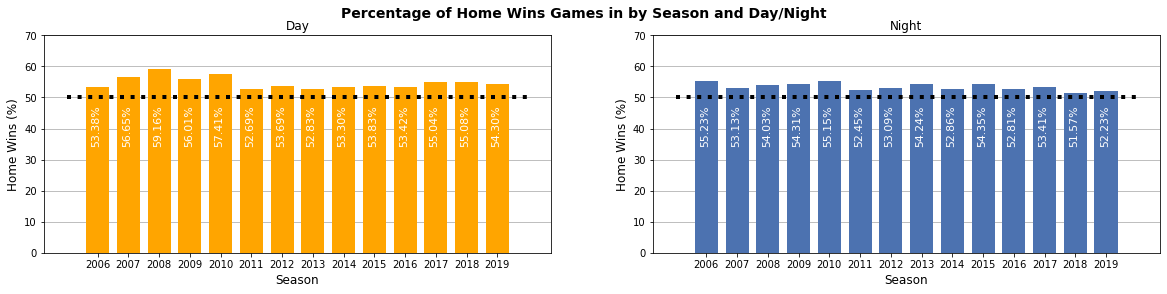

In [ ]:
d_day_home_wins = data_game[(data_game['day_night'] == 'D')].groupby(["season"]).agg(['mean'])['home_wins']
d_night_home_wins = data_game[(data_game['day_night'] == 'N')].groupby(["season"]).agg(['mean'])['home_wins']

# Plot the bar chart to compare home wins game by season and day/night
fig = plt.figure(figsize = (20,4))
ax = fig.add_subplot(1,2,1) 
ax.bar(d_day_home_wins.index, d_day_home_wins['mean']*100, 0.75, zorder=3, color='orange')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Home Wins (%)', fontsize = 12)
for j in d_day_home_wins.index:
    ax.text(-0.2+j, 35, format(d_day_home_wins['mean'][j], '.2%'),size=11, rotation=90, color='white')

min_x = d_day_home_wins.index.min()
max_x = d_day_home_wins.index.max()

ax.hlines(y=50, xmin=min_x-1, xmax=max_x+1, ls=':', lw=4, color='black', zorder=4)
ax.grid(axis='y', zorder=0)
ax.set_title('Day')
ax.set_xticks(np.arange(min_x,max_x+1,1))
ax.set_yticks(np.arange(0,80,10))

ax = fig.add_subplot(1,2,2) 
ax.bar(d_night_home_wins.index, d_night_home_wins['mean']*100, 0.75, zorder=3)
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Home Wins (%)', fontsize = 12)
for j in d_night_home_wins.index:
    ax.text(-0.2+j, 35, format(d_night_home_wins['mean'][j], '.2%'),size=11, rotation=90, color='white')

min_x = d_night_home_wins.index.min()
max_x = d_night_home_wins.index.max()

ax.hlines(y=50, xmin=min_x-1, xmax=max_x+1, ls=':', lw=4, color='black', zorder=4)
ax.grid(axis='y', zorder=0)
ax.set_title('Night')
ax.set_xticks(np.arange(min_x,max_x+1,1))
ax.set_yticks(np.arange(0,80,10))

plt.suptitle("Percentage of Home Wins Games in by Season and Day/Night", fontsize=14, fontweight='bold')
plt.show

### What are the distributions between home score and visiting scores?

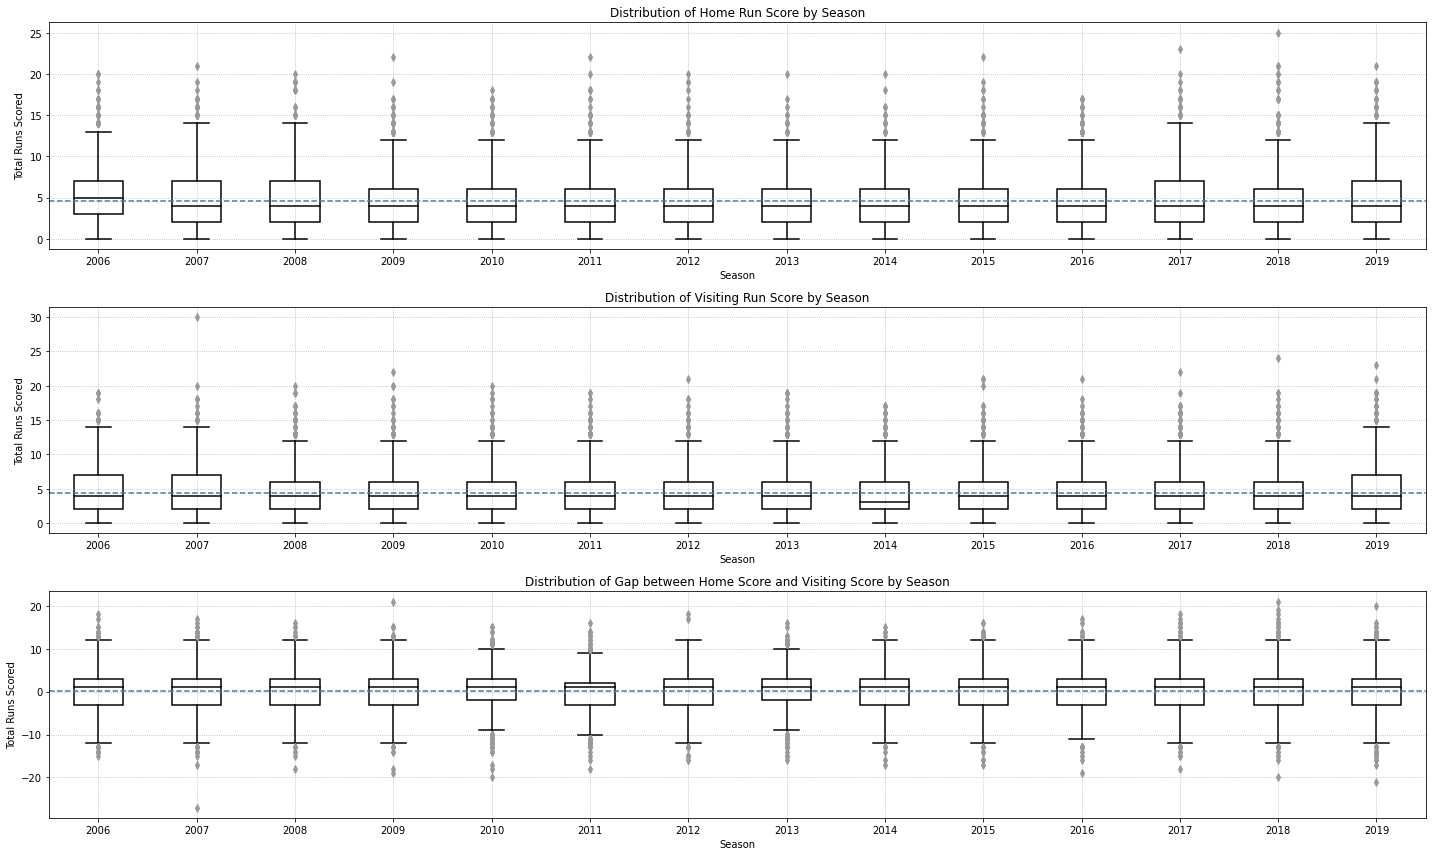

In [ ]:
# Plot for distribution of home score, visiting score and score gap
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(3,1,1) 
ax = sns.boxplot(x=data_game['season'], y=data_game['home_score'], data=data_game, color='white', width=.5)
ax.set_xlabel('Season')
ax.set_ylabel('Total Runs Scored')
ax.grid(linestyle='dotted')
ax.set_title('Distribution of Home Run Score by Season')
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.axhline(data_game['home_score'].mean(), ls='--')

ax = fig.add_subplot(3,1,2) 
ax = sns.boxplot(x=data_game['season'], y=data_game['visiting_score'], data=data_game, color='white', width=.5)
ax.set_xlabel('Season')
ax.set_ylabel('Total Runs Scored')
ax.grid(linestyle='dotted')
ax.set_title('Distribution of Visiting Run Score by Season')
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.axhline(data_game['visiting_score'].mean(), ls='--')

ax = fig.add_subplot(3,1,3) 
ax = sns.boxplot(x=data_game['season'], y=data_game['home_score']-data_game['visiting_score'], data=data_game, color='white', width=.5)
ax.set_xlabel('Season')
ax.set_ylabel('Total Runs Scored')
ax.grid(linestyle='dotted')
ax.set_title('Distribution of Gap between Home Score and Visiting Score by Season')
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.axhline((data_game['home_score']-data_game['visiting_score']).mean(), ls='--')

plt.tight_layout()

## Data Preparation

### Building a dataframe to combine all games played at home and away
To proceed with the analysis, a dataframe is build to combine all games played at home and away by each MLB team in every season. This will facilitate the game statistics from team perspective.

In [ ]:
# Columns for new dataframe
columns_visit = [
    'date', 'day_night', 'visiting_team', 'home_team',
    'visiting_score', 'home_score', 
    'park_id', 'visiting_abs', 'visiting_hits',
    'visiting_doubles', 'visiting_triples', 'visiting_homeruns',
    'visiting_rbi', 'visiting_sac_hits', 'visiting_sac_flies',
    'visiting_hbp', 'visiting_bb', 'visiting_iw', 'visiting_k',
    'visiting_sb', 'visiting_cs', 'visiting_gdp', 'visiting_ci',
    'visiting_lob', 'visiting_pitchers_used',
    'visiting_individual_er', 'visiting_er', 'visiting_wp',
    'visiting_balks', 'visiting_po', 'visiting_assists',
    'visiting_errors', 'visiting_pb', 'visiting_dp', 'visiting_tp',
    'home_hits', 'home_doubles', 'home_triples', 'home_homeruns',
    'home_bb'
]

columns_home = [
    'date', 'day_night', 'home_team', 'visiting_team', 
    'home_score', 'visiting_score',
    'park_id', 'home_abs', 'home_hits',
    'home_doubles', 'home_triples', 'home_homeruns',
    'home_rbi', 'home_sac_hits', 'home_sac_flies',
    'home_hbp', 'home_bb', 'home_iw', 'home_k',
    'home_sb', 'home_cs', 'home_gdp', 'home_ci',
    'home_lob', 'home_pitchers_used',
    'home_individual_er', 'home_er', 'home_wp',
    'home_balks', 'home_po', 'home_assists',
    'home_errors', 'home_pb', 'home_dp', 'home_tp',
    'visiting_hits', 'visiting_doubles', 'visiting_triples', 'visiting_homeruns',
    'visiting_bb'    
]

columns = [
    'date', 'day_night', 'team', 'opp_team',
    'team_score', 'opp_score',
    'park_id', 'abs', 'hits',
    'doubles', 'triples', 'homeruns',
    'rbi', 'sac_hits', 'sac_flies',
    'hbp', 'bb', 'iw', 'k',
    'sb', 'cs', 'gdp', 'ci',
    'lob', 'pitchers_used',
    'individual_er', 'er', 'wp',
    'balks', 'po', 'assists',
    'errors', 'pb', 'dp', 'tp',
    'opp_hits', 'opp_doubles', 'opp_triples', 'opp_homeruns',
    'opp_bb' 
]

In [ ]:
# Split game data into two rows: visiting and home teams 
# Visit
df_game_visit = data_game.loc[:,columns_visit]
df_game_visit.columns = columns
df_game_visit['home'] = False

# Home
df_game_home = data_game.loc[:,columns_home]
df_game_home.columns = columns
df_game_home['home'] = True

# Combine
df_game_by_teams = pd.concat([df_game_visit, df_game_home], ignore_index=True, sort=False)

# Season
df_game_by_teams['season']=pd.DatetimeIndex(df_game_by_teams['date']).year

# Win
df_game_by_teams['wins']=df_game_by_teams['team_score']>df_game_by_teams['opp_score']
df_game_by_teams.head(6)

,date,day_night,team,opp_team,team_score,opp_score,park_id,abs,hits,doubles,triples,homeruns,rbi,sac_hits,sac_flies,hbp,bb,iw,k,sb,cs,gdp,ci,lob,pitchers_used,individual_er,er,wp,balks,po,assists,errors,pb,dp,tp,opp_hits,opp_doubles,opp_triples,opp_homeruns,opp_bb,home,season,wins
0,2006-04-02,N,CLE,CHA,4,10,CHI12,33,7,2,0,1,4,0,1,0,1,0,5,0,0,0,0,4,6,10,10,0,0,24,7,2,0,2,0,9,1,0,1,9,False,2006,False
1,2006-04-03,D,TBA,BAL,6,9,BAL12,31,7,1,0,2,5,1,1,0,1,0,2,0,1,0,0,1,4,9,9,1,0,24,13,1,0,2,0,14,2,1,4,5,False,2006,False
2,2006-04-03,D,DET,KCA,3,1,KAN06,35,9,0,0,3,3,0,0,0,3,0,8,1,1,0,0,8,3,1,1,0,0,27,7,0,0,1,0,4,1,0,0,1,False,2006,True
3,2006-04-03,N,NYA,OAK,15,2,OAK01,44,17,4,0,2,15,1,0,3,9,0,8,0,1,0,0,15,3,2,2,0,0,27,7,1,0,0,0,8,0,0,1,0,False,2006,True
4,2006-04-03,D,ANA,SEA,5,4,SEA03,35,11,2,0,1,5,1,0,0,3,0,4,2,0,1,0,7,4,4,4,1,0,27,9,1,0,0,0,9,1,0,2,1,False,2006,True
5,2006-04-03,D,BOS,TEX,7,3,ARL02,38,12,3,0,2,7,0,0,0,2,1,5,0,0,0,0,6,3,3,3,0,0,27,7,0,0,0,0,7,1,0,1,1,False,2006,True


### Game winning percentages as home team and visiting team

With a new dataframe build, it is worth to explore further of the data from game perspective.

There is a clearly an advantage of the home team winning the game across all season and all MLB teams, with only a few extreme exceptions such as HOU in 2015 (29.63%) and DET in 2019 (27.16%). 

<function matplotlib.pyplot.show>

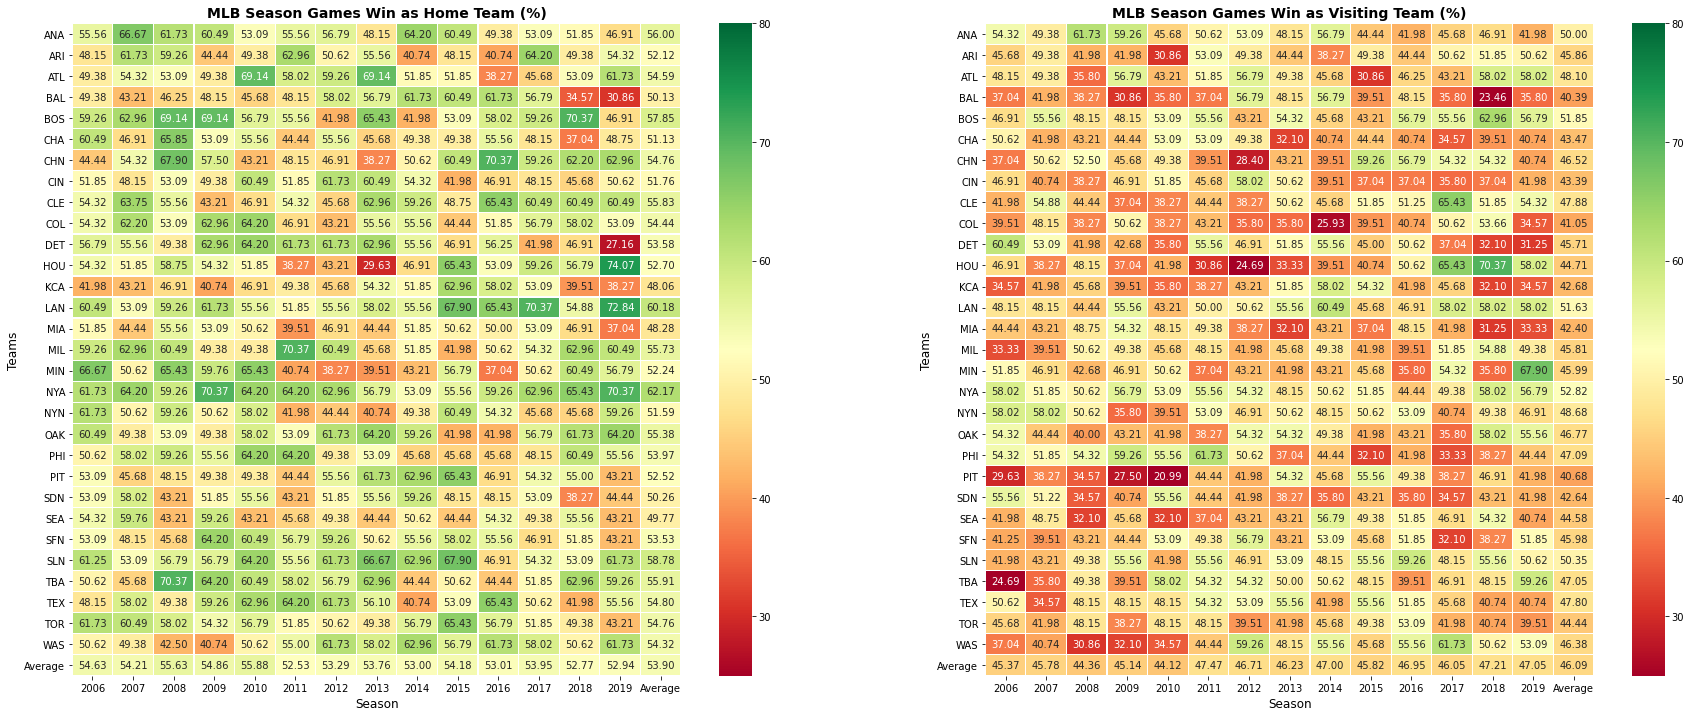

In [ ]:
# Dataframe for home team wins
d_home_wins = df_game_by_teams[(df_game_by_teams['home'] == True)].groupby(["team","season"]).agg(['mean'])['wins']
d_home_wins = d_home_wins.reset_index()
d_home_wins_pivot = d_home_wins.pivot_table(index = ["team"],columns = ["season"], values = "mean", aggfunc=np.mean)
d_home_wins_pivot.loc['Average',:]= d_home_wins_pivot.mean(axis=0)
d_home_wins_pivot.loc[:,'Average']= d_home_wins_pivot.mean(axis=1)

# Dataframe for visiting team wins
d_visit_wins = df_game_by_teams[(df_game_by_teams['home'] == False)].groupby(["team","season"]).agg(['mean'])['wins']
d_visit_wins = d_visit_wins.reset_index()
d_visit_wins_pivot = d_visit_wins.pivot_table(index = ["team"],columns = ["season"], values = "mean", aggfunc=np.mean)
d_visit_wins_pivot.loc['Average',:]= d_visit_wins_pivot.mean(axis=0)
d_visit_wins_pivot.loc[:,'Average']= d_visit_wins_pivot.mean(axis=1)

# Plot Heatmap
fig = plt.figure(figsize = (30,12))
ax = fig.add_subplot(1,2,1) 
ax = sns.heatmap(d_home_wins_pivot*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=25, vmax=80)
plt.title("MLB Season Games Win as Home Team (%)",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)

ax = fig.add_subplot(1,2,2) 
ax = sns.heatmap(d_visit_wins_pivot*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=25, vmax=80)
plt.title("MLB Season Games Win as Visiting Team (%)",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)

plt.show

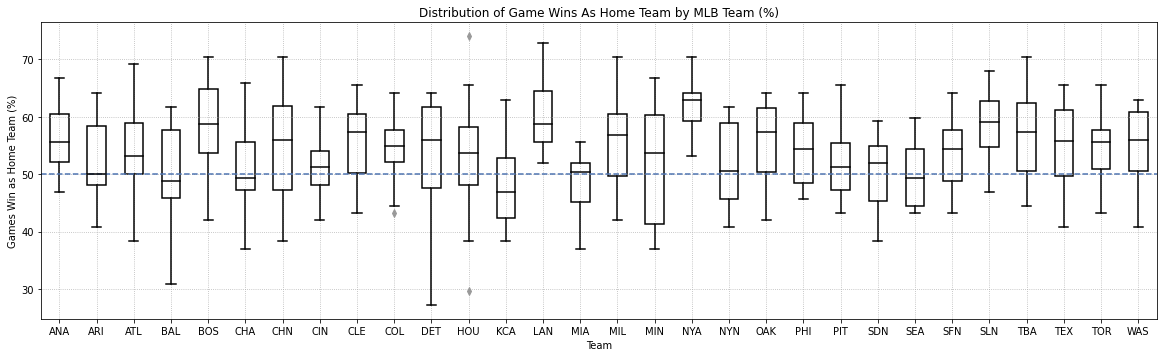

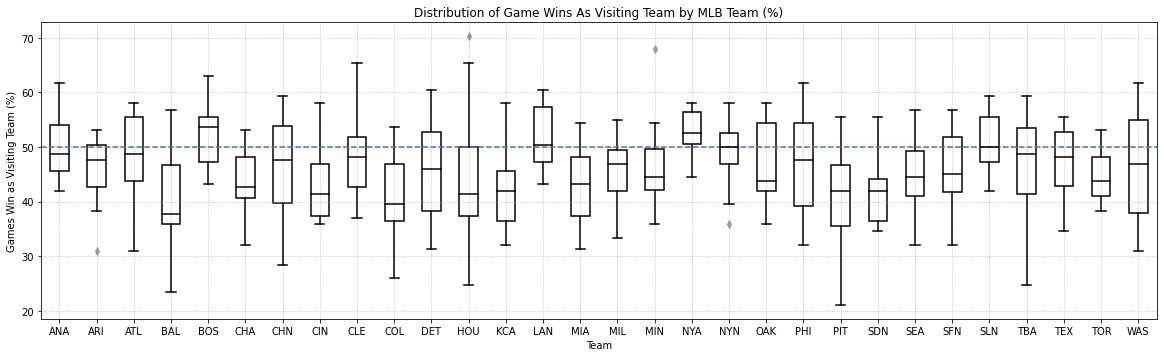

In [ ]:
# Plot for distribution of Games Win as Home Team
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(2,1,1) 
ax = sns.boxplot(x=d_home_wins['team'], y=d_home_wins['mean']*100, data=d_home_wins, color='white', width=.5)
ax.set_xlabel('Team')
ax.set_ylabel('Games Win as Home Team (%)')
ax.grid(linestyle='dotted')
ax.set_title('Distribution of Game Wins As Home Team by MLB Team (%)')
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.axhline(50, ls='--')

# Plot for distribution of Games Win as Home Team
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(2,1,2) 
ax = sns.boxplot(x=d_visit_wins['team'], y=d_visit_wins['mean']*100, data=d_visit_wins, color='white', width=.5)
ax.set_xlabel('Team')
ax.set_ylabel('Games Win as Visiting Team (%)')
ax.grid(linestyle='dotted')
ax.set_title('Distribution of Game Wins As Visiting Team by MLB Team (%)')
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.axhline(50, ls='--')
plt.show()

### Game winning percentages between day and night matches
There are some interesting differences of winning percentages in day and night matches. As pointed previously, most of the games are played during the night. From the following, teams are performing more consistently in night matches than day matches. There are some notable extremes of winning percentage of some MLB team for game played during the day.

<function matplotlib.pyplot.show>

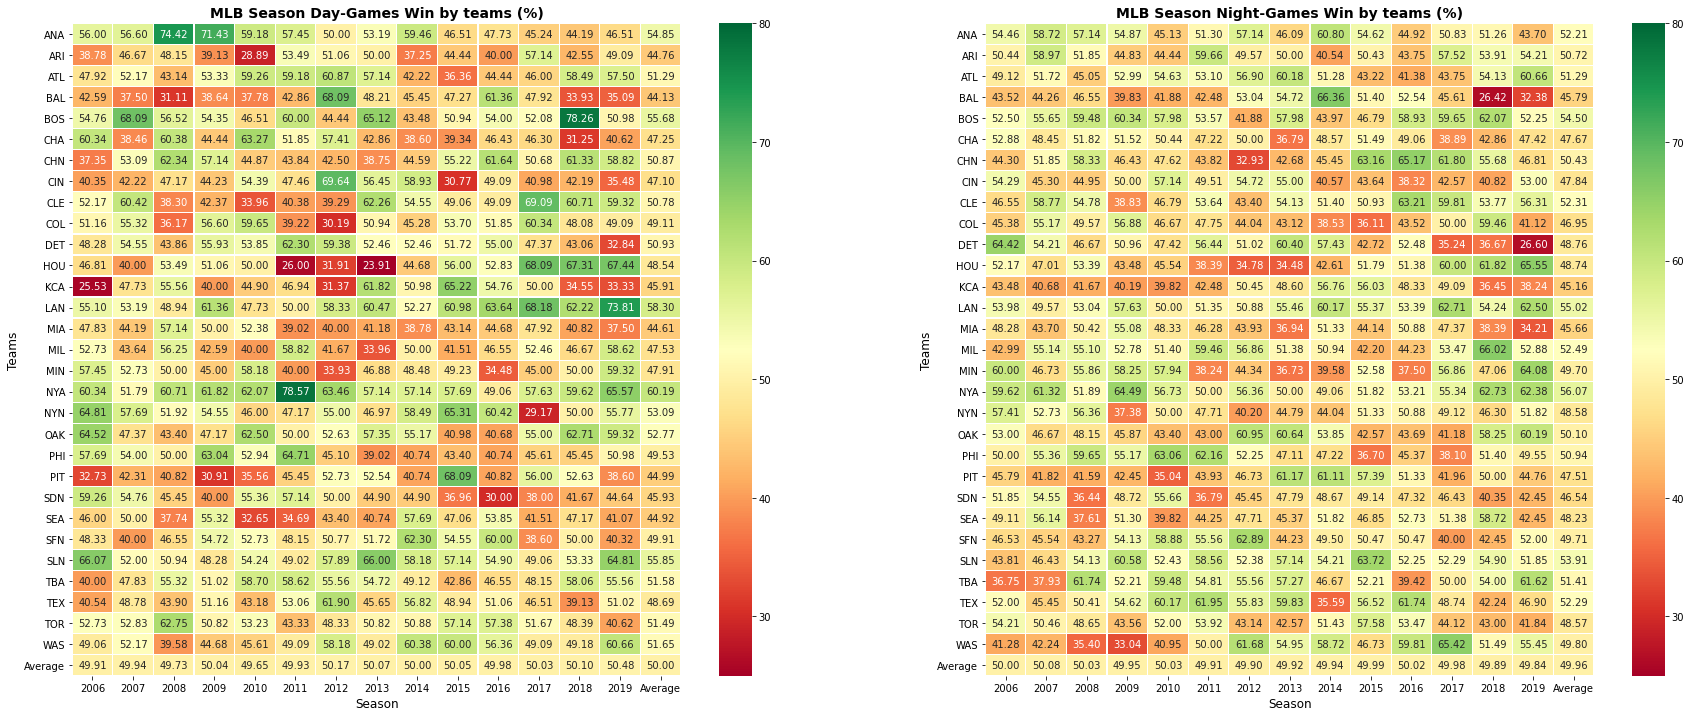

In [ ]:
# Dataframe for home team wins
d_day_wins = df_game_by_teams[(df_game_by_teams['day_night'] == 'D')].groupby(["team","season"]).agg(['mean'])['wins']
d_day_wins = d_day_wins.reset_index()
d_day_wins_pivot = d_day_wins.pivot_table(index = ["team"],columns = ["season"], values = "mean", aggfunc=np.mean)
d_day_wins_pivot.loc['Average',:]= d_day_wins_pivot.mean(axis=0)
d_day_wins_pivot.loc[:,'Average']= d_day_wins_pivot.mean(axis=1)

# Dataframe for visiting team wins
d_night_wins = df_game_by_teams[(df_game_by_teams['day_night'] == 'N')].groupby(["team","season"]).agg(['mean'])['wins']
d_night_wins = d_night_wins.reset_index()
d_night_wins_pivot = d_night_wins.pivot_table(index = ["team"],columns = ["season"], values = "mean", aggfunc=np.mean)
d_night_wins_pivot.loc['Average',:]= d_night_wins_pivot.mean(axis=0)
d_night_wins_pivot.loc[:,'Average']= d_night_wins_pivot.mean(axis=1)

# Plot Heatmap
fig = plt.figure(figsize = (30,12))
ax = fig.add_subplot(1,2,1) 
ax = sns.heatmap(d_day_wins_pivot*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=25, vmax=80)
plt.title("MLB Season Day-Games Win by teams (%)",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)

ax = fig.add_subplot(1,2,2) 
ax = sns.heatmap(d_night_wins_pivot*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=25, vmax=80)
plt.title("MLB Season Night-Games Win by teams (%)",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)

plt.show

### Function to calculate statistics of all past matches for both teams
In this function, all relevant metrics are calculated. All statistics are incorporated based on prematch data played by both home and visiting team. This is important so that the prediction is not based on any data related to the game aim to predict.

The assumption is that the result of an upcoming game is a based on both teams' performance in the past 162 games, which is approximately the number of game a team plays in a MLB season.

In [ ]:
# Calculate Team Statistics before the game
def get_prematch_stats(team, opp_team, game_date, day_night, season=1.0, all_stats=True):      
    
    # Number of seasons to consider, each team plays 162 games per season
    MAX_GAME = season * 162 

    # Number of past matchups games to consider.
    MAX_PAST_MATCHUPS = 20

    # all teams stats
    obp_all = 0
    slg_all = 0
    era_all = 0
    for single_team in df_game_by_teams.team.unique():
        df_single_team = df_game_by_teams[(df_game_by_teams['team'] == single_team) & (df_game_by_teams['date'] < game_date )]
        df_single_team = (df_single_team.sort_values('date')).tail(MAX_GAME)
        obp_all = obp_all + ((df_single_team['hits'].sum()+df_single_team['bb'].sum()+df_single_team['hbp'].sum())/(df_single_team['abs'].sum()+df_single_team['bb'].sum()+df_single_team['hbp'].sum()+df_single_team['sac_flies'].sum()))
        slg_all = slg_all + ((df_single_team['hits'].sum()+df_single_team['doubles'].sum()+2*df_single_team['triples'].sum()+3*df_single_team['homeruns'].sum())/df_single_team['abs'].sum())

        df_home_team = df_single_team[(df_single_team['home'] == True)]
        df_away_team = df_single_team[(df_single_team['home'] == False)]
        pf = ((df_home_team['team_score'].sum()+df_home_team['opp_score'].sum())/df_home_team.shape[0]) / ((df_away_team['team_score'].sum()+df_away_team['opp_score'].sum())/df_away_team.shape[0])
        era_all = era_all + (9 * df_single_team['er'].sum()/(df_single_team['po'].sum()/3))

    obp_all = obp_all/df_game_by_teams.team.unique().shape[0]
    slg_all = slg_all/df_game_by_teams.team.unique().shape[0]
    era_all = era_all/df_game_by_teams.team.unique().shape[0]
    
    d ={}    
    for prefix in ['home_','visiting_']:
        home_team = team if prefix == 'home_' else opp_team
        visiting_team = opp_team if prefix == 'home_' else team

        df = df_game_by_teams[(df_game_by_teams['team'] == home_team) & (df_game_by_teams['date'] < game_date )]
        df = (df.sort_values('date', ascending=False)).head(MAX_GAME)
        df = df.reset_index(drop=True)            

        df_home = df[(df['home'] == True)]
        df_away = df[(df['home'] == False)]

        df_day_night = df[(df['day_night'] == day_night)]

        df_past_match = df_game_by_teams[(df_game_by_teams['team'] == home_team) & (df_game_by_teams['opp_team'] == visiting_team) & (df_game_by_teams['date'] < game_date )]
        df_past_match = (df_past_match.sort_values('date', ascending=False)).head(MAX_PAST_MATCHUPS) 
        df_past_match = df_past_match.reset_index(drop=True)    

        ########################################################
        # batting stats
        ########################################################
        # On-Base Percentage [https://www.baseball-reference.com/bullpen/On_base_percentage]
        d[prefix + 'obp'] = (df['hits'].sum()+df['bb'].sum()+df['hbp'].sum())/(df['abs'].sum()+df['bb'].sum()+df['hbp'].sum()+df['sac_flies'].sum())

        # Slugging Percenage [https://www.baseball-reference.com/bullpen/Slugging_percentage]
        d[prefix + 'slg'] = (df['hits'].sum()+df['doubles'].sum()+2*df['triples'].sum()+3*df['homeruns'].sum())/df['abs'].sum()

        # Batting Average [https://www.baseball-reference.com/bullpen/Batting_average]
        d[prefix + 'ba'] = df['hits'].sum()/df['abs'].sum()

        # Runs batted in [https://www.baseball-reference.com/bullpen/Runs_batted_in]
        d[prefix + 'rbi'] = df['rbi'].sum()

        # Walk drawn or base on balls [https://www.baseball-reference.com/bullpen/Walk]
        d[prefix + 'wb'] = df['bb'].sum()

        # Run Scored per game 
        d[prefix + 'rg'] = df['team_score'].sum()/df.shape[0]

        # On-Base Plus Sluggig [https://www.baseball-reference.com/bullpen/OPS]
        d[prefix + 'ops'] = 100*((d[prefix + 'obp']/obp_all) + (d[prefix + 'slg']/slg_all)-1)

        # Batting average on balls in play [https://www.baseball-reference.com/bullpen/Batting_average_on_balls_in_play]
        d[prefix + 'babip'] = (df['hits'].sum()-df['homeruns'].sum()) / (df['abs'].sum()-df['k'].sum()-df['homeruns'].sum()+df['sac_flies'].sum())

        ########################################################
        # pitching stats
        ########################################################
        # Earned run average [https://www.baseball-reference.com/bullpen/Earned_run_average]
        d[prefix + 'era'] = 9 * df['er'].sum()/(df['po'].sum()/3)

        # Hits allowed
        d[prefix + 'h'] = df['opp_hits'].sum()

        # Bases allowed = Opponent Hits + Opp Double + 2*Opp Triples + 3*Opp HomeRuns
        d[prefix + 'b'] = (df['opp_hits'].sum()+df['opp_doubles'].sum()+2*df['opp_triples'].sum()+3*df['opp_homeruns'].sum())

        # Strike-outs
        d[prefix + 'k'] = df['k'].sum()

        # Walk Thrown
        d[prefix + 'wp'] = df['opp_bb'].sum()

        # Innings pitched [https://www.baseball-reference.com/bullpen/Inning]
        d[prefix + 'ip'] = (df['po'].sum()/3)

        # Walks plus hits divided by innings pitched [https://www.baseball-reference.com/bullpen/WHIP]
        d[prefix + 'whip'] = ((df['opp_hits'].sum()+df['opp_bb'].sum())/(df['po'].sum()/3))

        # 9 x Hits / Innings Pitched [http://m.mlb.com/glossary/advanced-stats/hits-per-nine-innings]
        d[prefix + 'h9'] = 9 * df['opp_hits'].sum()/(df['po'].sum()/3)

        # 9 x HR / Innings Pitched [http://m.mlb.com/glossary/advanced-stats/home-runs-per-nine-innings] 
        d[prefix + 'hr9'] = 9 * df['opp_homeruns'].sum()/(df['po'].sum()/3)

        # 9 x BB / Innings Pitched [http://m.mlb.com/glossary/advanced-stats/walks-per-nine-innings]
        d[prefix + 'bb9'] = 9 * df['opp_bb'].sum()/(df['po'].sum()/3)

        # Runs allowed per game 
        d[prefix + 'rag'] = df['opp_score'].sum()/df.shape[0]

        ########################################################
        # other stats
        ########################################################

        # Plate Appearance [http://m.mlb.com/glossary/standard-stats/plate-appearance]
        d[prefix + 'pa'] = df['abs'].sum() + df['bb'].sum() + df['hbp'].sum() + df['sac_flies'].sum() + df['sac_hits'].sum()
        
        # Number of Errors [http://m.mlb.com/glossary/standard-stats/error]
        d[prefix + 'e'] = df['errors'].sum()

        # Left-on base [http://m.mlb.com/glossary/standard-stats/left-on-base]
        d[prefix + 'lob'] = df['lob'].sum()

        # Win-Loss Record [https://www.baseball-reference.com/bullpen/Win-loss_record]
        d[prefix + 'w_prct'] = df['wins'].sum()/df.shape[0]
        
        # Head-to-Head Winning Record
        d[prefix + 'h2h_prct'] = df_past_match['wins'].sum()/df_past_match.shape[0] if df_past_match.shape[0]>0 else 0

        # Park Factor [https://en.wikipedia.org/wiki/Batting_park_factor]
        d[prefix + 'pf'] = ((df_home['team_score'].sum()+df_home['opp_score'].sum())/df_home.shape[0]) / ((df_away['team_score'].sum()+df_away['opp_score'].sum())/df_away.shape[0])
        
        # Pythagorean expectation. [https://en.wikipedia.org/wiki/Pythagorean_expectation]
        # Baseball Reference uses 1.83 [https://www.sports-reference.com/blog/baseball-reference-faqs/]   
        d[prefix + 'pythE'] = 1 / (1 + (df['opp_score'].sum() / df['team_score'].sum()) ** (1.5 * math.log10((df['opp_score'].sum() + df['team_score'].sum())/df.shape[0]) + 0.45))

        # https://sabr.org/journal/article/a-new-formula-to-predict-a-teams-winning-percentage/
        
        # ERA+ Formulae: https://en.wikipedia.org/wiki/Adjusted_ERA%2B#cite_note-1
        d[prefix + 'era+'] = 100*(2-(d[prefix + 'era']/era_all*1/d[prefix + 'pf']))
        #d[prefix + 'era+_old'] = 100*(era_all/d[prefix + 'era']*d[prefix + 'pf'])

        # Days Rest before the match, maximum 3 days
        d[prefix + 'day_rest'] = min(abs((game_date - df['date'].max()).days), 3)

        # Win-Loss Record with consideration of home/visiting        
        d[prefix + 'w_prct_home'] = df_home['wins'].sum()/df_home.shape[0] 
        d[prefix + 'w_prct_away'] = df_away['wins'].sum()/df_away.shape[0] 

        # Win-Loss Record with consideration of day/night
        d[prefix + 'day_night'] = df_day_night['wins'].sum()/df_day_night.shape[0] 

    stats = {}
    stats['log5']=(d['home_w_prct']-d['home_w_prct']*d['visiting_w_prct'])/(d['home_w_prct']+d['visiting_w_prct']-2*d['home_w_prct']*d['visiting_w_prct'])
    stats['pythE']=d['home_pythE']-d['visiting_pythE']
    stats['w_prct']=d['home_w_prct']-d['visiting_w_prct']
    stats['rg']=d['home_rg']-d['visiting_rg']    
    stats['rag']=d['home_rag']-d['visiting_rag']
    stats['era']=d['home_era']-d['visiting_era']
    stats['era+']=d['home_era+']-d['visiting_era+']
    stats['rest_adv']=d['home_day_rest']-d['visiting_day_rest']
    stats['w_prct_home_adv']=d['home_w_prct_home']-d['visiting_w_prct_away']
    stats['day_night'] = d['home_day_night']-d['visiting_day_night']

    stats['b']=d['home_b']-d['visiting_b']
    stats['ba']=d['home_ba']-d['visiting_ba']
    stats['babip']=d['home_babip']-d['visiting_babip']
    stats['bb9']=d['home_bb9']-d['visiting_bb9']
    stats['e']=d['home_e']-d['visiting_e']
    stats['h']=d['home_h']-d['visiting_h']
    stats['h2h_prct']=d['home_h2h_prct']
    stats['h9']=d['home_h9']-d['visiting_h9']
    stats['hr9']=d['home_hr9']-d['visiting_hr9']
    stats['ip']=d['home_ip']-d['visiting_ip']    
    stats['k']=d['home_k']-d['visiting_k']
    stats['lob']=d['home_lob']-d['visiting_lob']
    stats['obp']=d['home_obp']-d['visiting_obp']
    stats['ops']=d['home_ops']-d['visiting_ops']
    stats['pa']=d['home_pa']-d['visiting_pa']    
    stats['rbi']=d['home_rbi']-d['visiting_rbi']
    stats['slg']=d['home_slg']-d['visiting_slg']
    stats['wb']=d['home_wb']-d['visiting_wb']
    stats['whip']=d['home_whip']-d['visiting_whip']
    stats['wp']=d['home_wp']-d['visiting_wp']

    if ( all_stats ):
        # To combine lists
        big_stats = {**stats, **d}
        return big_stats
        #return np.array(list(big_stats.values()))
    else:
        return np.array(list(stats.values()))    

In [ ]:
# Checking calculated statistics with Season 2009
# https://www.baseball-reference.com/leagues/MLB/2009.shtml
# For park factor: https://www.retrosheet.org/boxesetc/MISC/PKDIR.htm
test = get_prematch_stats('ARI','SDN',datetime.strptime('2010-12-31', "%Y-%m-%d"),'D',1,True)
(pd.DataFrame.from_dict(test, orient='index')).T

,log5,pythE,w_prct,rg,rag,era,era+,rest_adv,w_prct_home_adv,day_night,b,ba,babip,bb9,e,h,h2h_prct,h9,hr9,ip,k,lob,obp,ops,pa,rbi,slg,wb,whip,wp,home_obp,home_slg,home_ba,home_rbi,home_wb,home_rg,home_ops,home_babip,home_era,home_h,...,home_w_prct,home_h2h_prct,home_pf,home_pythE,home_era+,home_day_rest,home_w_prct_home,home_w_prct_away,home_day_night,visiting_obp,visiting_slg,visiting_ba,visiting_rbi,visiting_wb,visiting_rg,visiting_ops,visiting_babip,visiting_era,visiting_h,visiting_b,visiting_k,visiting_wp,visiting_ip,visiting_whip,visiting_h9,visiting_hr9,visiting_bb9,visiting_rag,visiting_pa,visiting_e,visiting_lob,visiting_w_prct,visiting_h2h_prct,visiting_pf,visiting_pythE,visiting_era+,visiting_day_rest,visiting_w_prct_home,visiting_w_prct_away,visiting_day_night
0,0.348993,-0.135603,-0.154321,0.296296,1.574074,1.415194,-18.106566,0.0,-0.061728,-0.264683,475.0,0.003361,0.022139,0.249124,30.0,198.0,0.5,1.381455,0.460826,-24.333333,346.0,14.0,0.007247,13.233913,36.0,61.0,0.044311,51.0,0.181175,31.0,0.32465,0.415677,0.249589,691.0,589.0,4.401235,103.05284,0.311695,4.807961,1503.0,...,0.401235,0.5,1.048942,0.424167,87.499451,3.0,0.493827,0.308642,0.288889,0.317403,0.371365,0.246227,630.0,538.0,4.104938,89.818927,0.289556,3.392767,1305.0,2006.0,1183.0,517.0,1456.333333,1.251087,8.064775,0.859007,3.19501,3.58642,6147.0,72.0,1125.0,0.555556,0.5,0.882175,0.55977,105.606017,3.0,0.555556,0.555556,0.553571


### Visualise accumulated statistics in MLB Season 2019
Example of four accumulated statistics corresponding to the Oakland Athletics (blue) and San Francisco Giants (orange) during the 2019 MLB regular season.

In [ ]:
# MLB seasons 2019
df = data_game[(data_game['date'] >= '2019-01-01' ) & (data_game['date'] <= '2019-12-31' )]

# Reset index of the data frame
df = df.reset_index(drop=True)

# Get Stats
%time test = list(map(lambda x,y,z,d:get_prematch_stats(x,y,z,d,1,True), df['home_team'],df['visiting_team'],df['date'],df['day_night']))
df_test = pd.DataFrame(test)

df_test["date"] = df[["date"]]
df_test["home_team"] = df[["home_team"]]
df_test["visiting_team"] = df[["visiting_team"]]

CPU times: user 13min 21s, sys: 3.17 s, total: 13min 24s
Wall time: 13min 25s


In [ ]:
# Oakland Athletics
df_oak = pd.concat([pd.DataFrame(df_test[(df_test['home_team'] == 'OAK' )]), pd.DataFrame(df_test[(df_test['visiting_team'] == 'OAK' )])], axis=0)
df_oak = df_oak.sort_values('date', ascending=True)
df_oak = df_oak.reset_index(drop=True)   

# Pythagorean Expectation
df_oak['pythE_'] = 0
df_oak.loc[df_oak['home_team'] == 'OAK', 'pythE_'] = df_oak['home_pythE']
df_oak.loc[df_oak['visiting_team'] == 'OAK', 'pythE_'] = df_oak['visiting_pythE']

# On-Base Plus Slugging
df_oak['ops_'] = 0
df_oak.loc[df_oak['home_team'] == 'OAK', 'ops_'] = df_oak['home_ops']
df_oak.loc[df_oak['visiting_team'] == 'OAK', 'ops_'] = df_oak['visiting_ops']

# ERA
df_oak['era_'] = 0
df_oak.loc[df_oak['home_team'] == 'OAK', 'era_'] = df_oak['home_era']
df_oak.loc[df_oak['visiting_team'] == 'OAK', 'era_'] = df_oak['visiting_era']

# San Francisco Giants
df_sfn = pd.concat([pd.DataFrame(df_test[(df_test['home_team'] == 'SFN' )]), pd.DataFrame(df_test[(df_test['visiting_team'] == 'SFN' )])], axis=0)
df_sfn = df_sfn.sort_values('date', ascending=True)
df_sfn = df_sfn.reset_index(drop=True)   

# Pythagorean Expectation
df_sfn['pythE_'] = 0
df_sfn.loc[df_sfn['home_team'] == 'SFN', 'pythE_'] = df_sfn['home_pythE']
df_sfn.loc[df_sfn['visiting_team'] == 'SFN', 'pythE_'] = df_sfn['visiting_pythE']

# On-Base Plus Slugging
df_sfn['ops_'] = 0
df_sfn.loc[df_sfn['home_team'] == 'SFN', 'ops_'] = df_sfn['home_ops']
df_sfn.loc[df_sfn['visiting_team'] == 'SFN', 'ops_'] = df_sfn['visiting_ops']

# ERA
df_sfn['era_'] = 0
df_sfn.loc[df_sfn['home_team'] == 'SFN', 'era_'] = df_sfn['home_era']
df_sfn.loc[df_sfn['visiting_team'] == 'SFN', 'era_'] = df_sfn['visiting_era']

<bound method Figure.show of <Figure size 1440x864 with 4 Axes>>

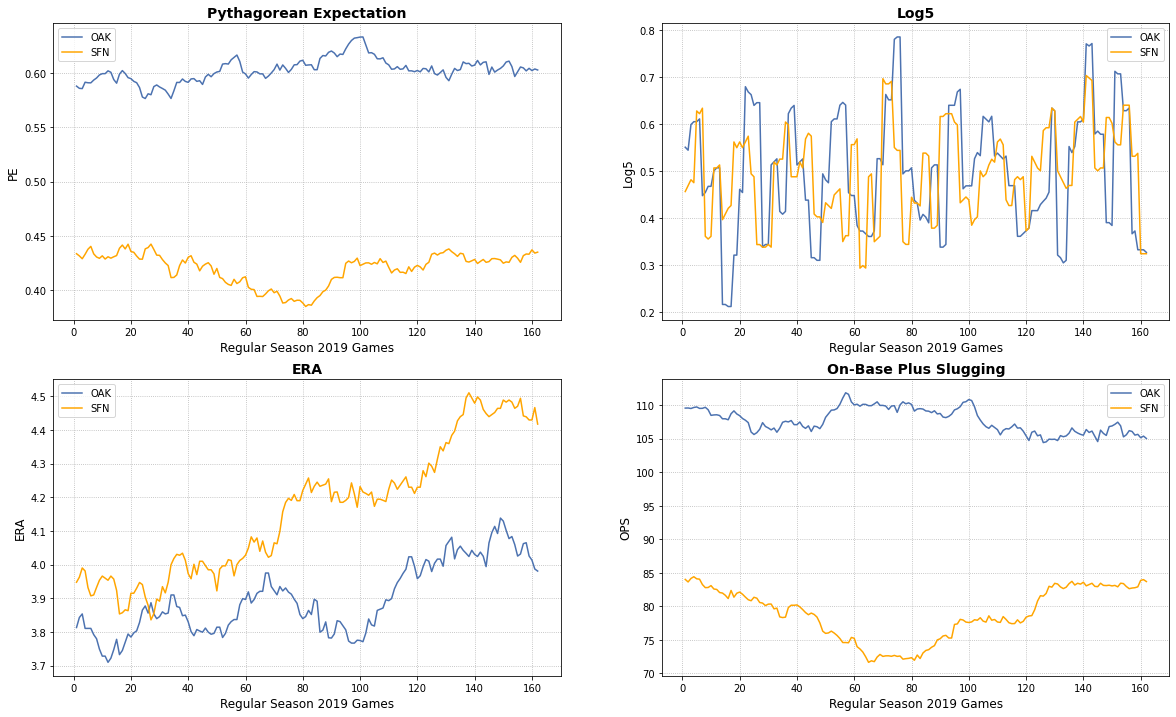

In [ ]:
fig = plt.figure(figsize = (20,12))

ax = fig.add_subplot(2,2,1) 
ax.plot(df_oak.index+1,df_oak["pythE_"])
ax.plot(df_sfn.index+1,df_sfn["pythE_"],color="orange")
plt.title("Pythagorean Expectation", fontsize=14, fontweight='bold')
ax.set_xlabel('Regular Season 2019 Games', fontsize = 12)
ax.set_ylabel('PE', fontsize = 12)
ax.grid(linestyle='dotted')
ax.legend(['OAK','SFN'])

ax = fig.add_subplot(2,2,2) 
ax.plot(df_oak.index+1,df_oak["log5"])
ax.plot(df_sfn.index+1,df_sfn["log5"],color="orange")
plt.title("Log5", fontsize=14, fontweight='bold')
ax.set_xlabel('Regular Season 2019 Games', fontsize = 12)
ax.set_ylabel('Log5', fontsize = 12)
ax.grid(linestyle='dotted')
ax.legend(['OAK','SFN'])

ax = fig.add_subplot(2,2,3) 
ax.plot(df_oak.index+1,df_oak["era_"])
ax.plot(df_sfn.index+1,df_sfn["era_"],color="orange")
plt.title("ERA", fontsize=14, fontweight='bold')
ax.set_xlabel('Regular Season 2019 Games', fontsize = 12)
ax.set_ylabel('ERA', fontsize = 12)
ax.grid(linestyle='dotted')
ax.legend(['OAK','SFN'])

ax = fig.add_subplot(2,2,4) 
ax.plot(df_oak.index+1,df_oak["ops_"])
ax.plot(df_sfn.index+1,df_sfn["ops_"],color="orange")
plt.title("On-Base Plus Slugging", fontsize=14, fontweight='bold')
ax.set_xlabel('Regular Season 2019 Games', fontsize = 12)
ax.set_ylabel('OPS', fontsize = 12)
ax.grid(linestyle='dotted')
ax.legend(['OAK','SFN'])

fig.show

### Generate stats for all games in MLB Seasons

In [ ]:
# All MLB seasons 2010-2019
df_model = data_game[(data_game['date'] >= '2007-01-01' )]
#df_model = data_game[(data_game['date'] >= '2010-01-01' ) & (data_game['date'] <= '2010-12-31' )]

# Reset index of the data frame
df_model = df_model.reset_index(drop=True)

##########################################################
# CAUTION! This takes a long time to run. (2hr 22mins)
##########################################################
# Independent Variables (X)
#%time X = np.array(list(map(lambda x,y,z,d:get_prematch_stats(x,y,z,d,1,False), df_model['home_team'],df_model['visiting_team'],df_model['date'],df_model['day_night'])))
#np.save(path + '/model_data_X_2007_2019_1season.npy', X)

# CPU times: user 2h 51min 20s, sys: 29.1 s, total: 2h 51min 49s
# Wall time: 2h 53min 49s
#%time X = np.array(list(map(lambda x,y,z:get_prematch_stats(x,y,z,1,False), df_model['home_team'],df_model['visiting_team'],df_model['date'])))
#np.save(path + '/model_data_X_2010_2019_1season_v3.npy', X)

#%time X = np.array(list(map(lambda x,y,z:get_prematch_stats(x,y,z,3,False), df_model['home_team'],df_model['visiting_team'],df_model['date'])))
#np.save(path + '/model_data_X_2010_2019_3seasons.npy', X)

# Dependent Variables (y)
#y = np.array(df_model['home_wins'])
#np.save(path + '/model_data_y_2007_2019.npy', y)

#X[0:5,:]

In [ ]:
#df_model = data_game[(data_game['date'] >= '2007-01-01' )]
#df_model = df_model.reset_index(drop=True)

# CPU times: user 3h 40min 3s, sys: 32.1 s, total: 3h 40min 35s
# Wall time: 3h 43min 43s
#%time X = np.array(list(map(lambda x,y,z:get_prematch_stats(x,y,z,1), df_model['home_team'],df_model['visiting_team'],df_model['date'])))
#np.save(path + '/model_data_X_2007_2019_1season.npy', X)

Load saved stats 

In [ ]:
# Load saved results
X = np.load(path + '/model_data_X_2007_2019_1season.npy')
y = np.load(path + '/model_data_y_2007_2019.npy')

### Shaping the data to be suitable for model fitting

In [ ]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
# Putting it into Data Frame
df_X = np.c_[X]
df_X = pd.DataFrame(data=X, columns=['log5','pythE','w_prct','rg','rag','era','era+','rest_adv','w_prct_home_adv','day_night','b','ba','babip','bb9','e','h','h2h_prct','h9','hr9','ip','k','lob','obp','ops','pa','rbi','slg','wb','whip','wp'])

### Examine class distribution by feature
Is there a linear relationships between features and home win?

In [ ]:
df = pd.concat([df_X, pd.DataFrame(y, columns=['home_wins'])], axis=1)
%time g = sns.pairplot(df, hue="home_wins")#, palette="tab10") 

### Checking correlations between features

Here we visualise the correlation between features: the less correlated, the better. The main diagonal shows how each feature is correlated with itself for each class:


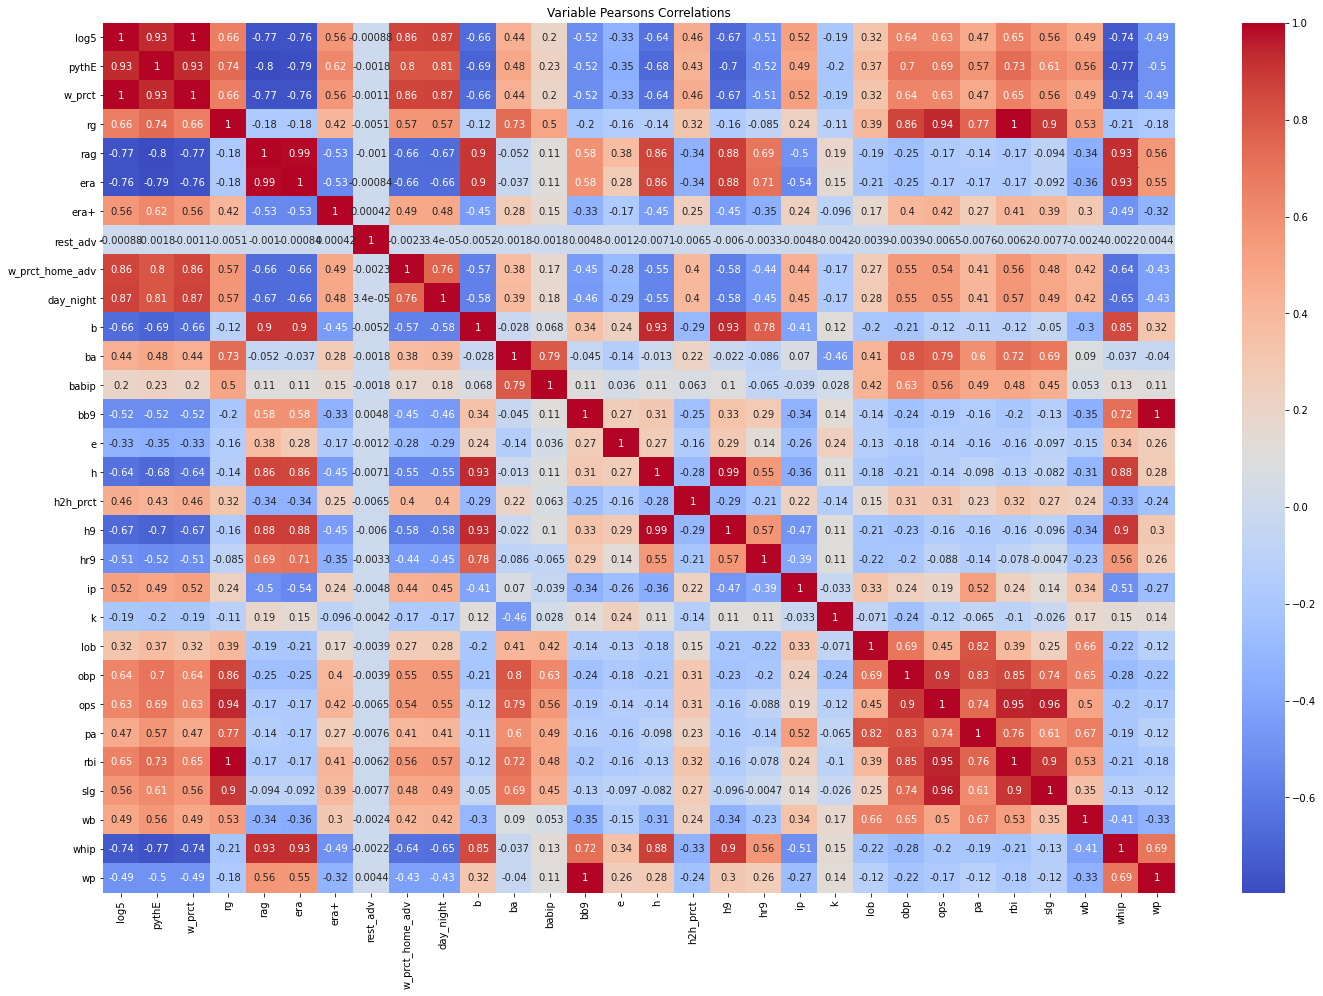

In [ ]:
# Correlations Heatmap
plt.figure(figsize = (24, 16))
sns.heatmap(df_X.corr(), cmap='coolwarm', annot=True)
plt.title('Variable Pearson''s Correlations');

### Removing highly-correlated features

In [ ]:
# Game variables have correlations above 0.8 and below -0.8
# Columns that are highly correlated:
# - log5 and w_prct: 1.0
# - bb9 and wp: 1.0
# - h9 and h: 0.99
# - rg and rbi: 1.0
df_X = df_X.drop(["w_prct", "wp", "h", "rbi"], axis=1)

# - h9 and whip: 
# - pythE and log5
# - obp and ops
# - era and rag
# - h9 and b
# - slg and rg
# - era and h9
# - obp and pa
# - obp and ba
# - pythE and w_prct_home_adv
# - pythE and day_night
# - obp and slg
df_X = df_X.drop(["whip", "log5", "ops", "rag", "b", "rg", "h9", "pa", "ba", "w_prct_home_adv", "day_night", "slg"], axis=1)
X = np.array(df_X)

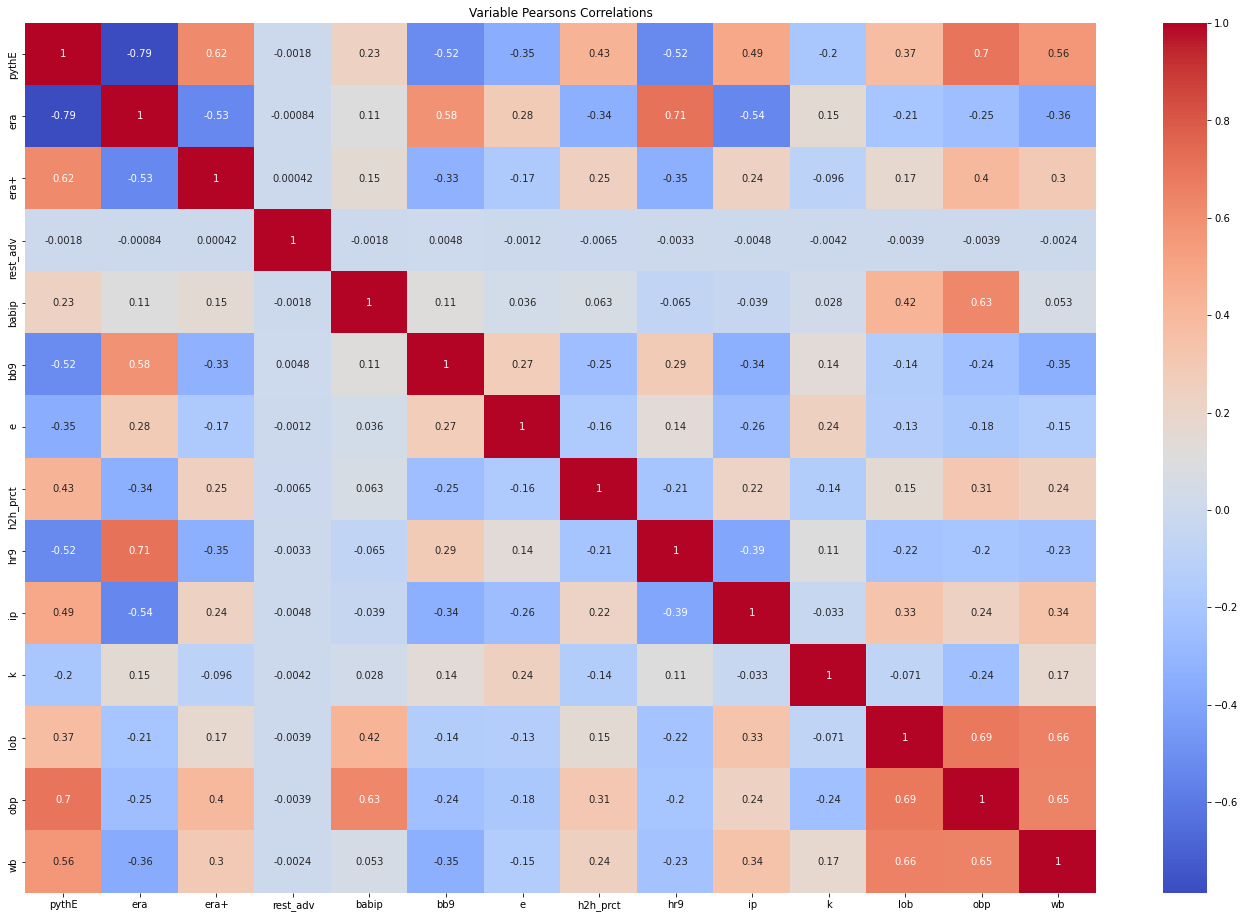

In [ ]:
# Check again
plt.figure(figsize = (24, 16))
sns.heatmap(df_X.corr(), cmap='coolwarm', annot=True)
plt.title('Variable Pearson''s Correlations');

### Principal Component Analysis

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_model[['home_wins']]], axis=1)
finalDf.head(6)

,principal component 1,principal component 2,home_wins
0,1.071994,-0.788282,0
1,-2.478847,-0.908616,1
2,-0.121832,-1.236926,0
3,-2.825867,1.648700,0
4,3.667491,0.402645,1
5,-1.796514,-1.197355,0


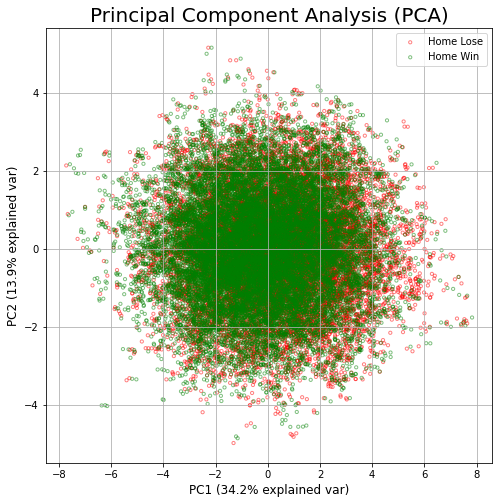

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1 (' + format(pca.explained_variance_ratio_[0]*100, '.1f') + '% explained var)', fontsize = 12)
ax.set_ylabel('PC2 (' + format(pca.explained_variance_ratio_[1]*100, '.1f') + '% explained var)', fontsize = 12)
ax.set_title('Principal Component Analysis (PCA)', fontsize = 20)
results = [0, 1]
colors = ['r', 'g']
for result, color in zip(results, colors):
    indicesToKeep = finalDf['home_wins'] == result
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , alpha=0.5
               ,facecolors='none', edgecolors=color
               #, c = color
               , s = 10)
    
ax.legend(['Home Lose','Home Win'])
ax.grid()

In [ ]:
# 99%
pca = PCA(.99)
principalComponents = pca.fit_transform(df_X)

# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    df_importance  = pd.DataFrame(pca.components_)

    # Assign columns
    df_importance.columns  = original_num_df.columns

    # Change to absolute values
    df_importance =df_importance.apply(np.abs)

    # Transpose
    df_importance=df_importance.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = df_importance.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    df_importance.columns  =new_columns

    # Return importance df
    return df_importance

# Call function to create importance df
df_importance = create_importance_dataframe(pca, df_X)

<function matplotlib.pyplot.show>

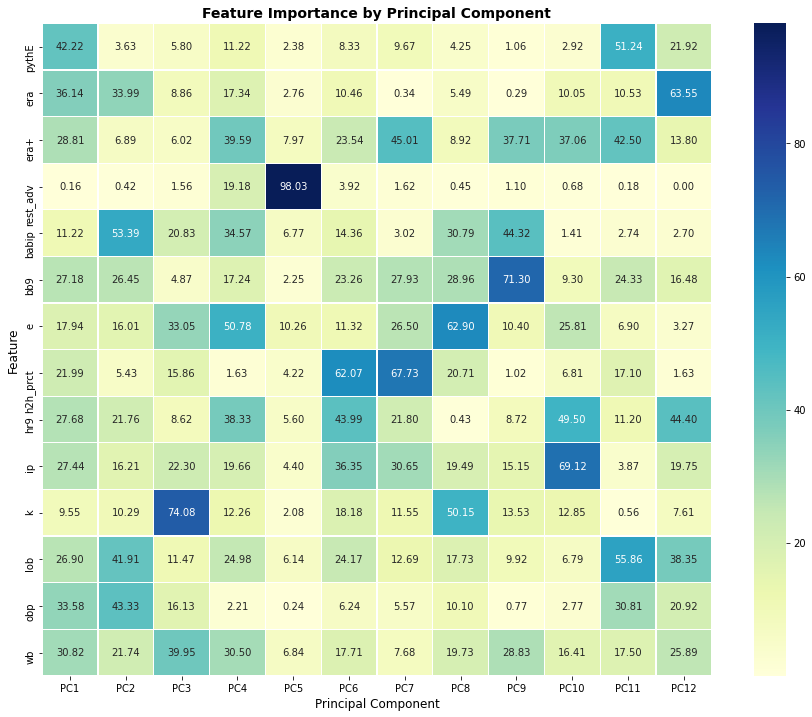

In [ ]:
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(1,1,1) 
ax = sns.heatmap(df_importance*100, annot=True, fmt=".2f", linewidths=.2, cmap="YlGnBu")
plt.title("Feature Importance by Principal Component",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Principal Component', fontsize = 12)
ax.set_ylabel('Feature', fontsize = 12)
plt.show

# Sort depending on PC of interest


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [99.0%] explained variance using the [14] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [12] that covers the [99.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
      PC   feature   loading  type
0    PC1     pythE -0.422196  best
1    PC2     babip -0.533891  best
2    PC3         k  0.740820  best
3    PC4         e -0.507801  best
4    PC5  rest_adv  0.980288  best
5    PC6  h2h_prct -0.620695  best
6    PC7  h2h_prct  0.677294  best
7    PC8         e -0.628960  best
8    PC9       bb9  0.712971  best
9   PC10        ip -0.691169  best
10  PC11       lob  0.558633  best
11  PC12       era -0.635533  best
12  PC13     pythE  0.497995  best
13  PC14       obp  0.699934  best
1

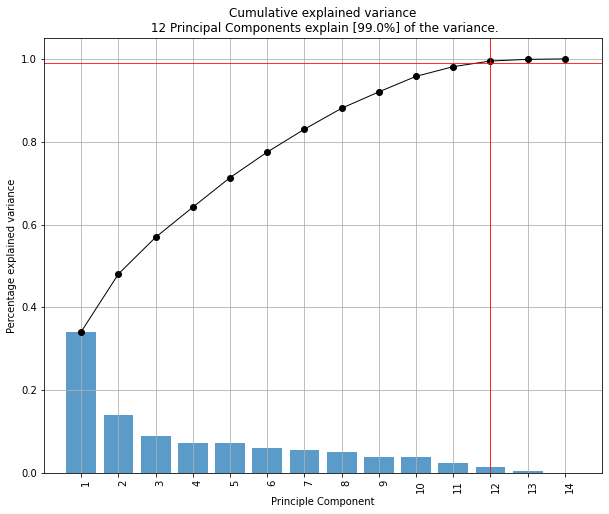

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c7bd01ef0>)

<Figure size 432x288 with 0 Axes>

In [ ]:
# Initialize
model = prin_ca(.99)

# Fit transform
out = model.fit_transform(df_X)

print(out['topfeat'])
model.plot()

## Model Fitting

For Neural Network, the classifier needs to have one output neuron for each class - i.e. Home Wins and Home Lose. This means we will have to transform this data into an M x 2 matrix

In [ ]:
# Converting y to one hot encoder
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()
y[0:10,:]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### Model Definition


In [ ]:
# Function to create ANN model
def create_model(optimizer='adam', init_mode='uniform', activation='relu', neurons=1, metrics=['accuracy'], hidden_layers=1, name='model', loss='binary_crossentropy', n_features=10):
	# create model
	model = Sequential(name=name)

	# input layer
	model.add(Dense(neurons, input_dim=n_features, activation=activation))

    # hidden layers
	for i in range(hidden_layers):
		model.add(Dense(neurons, activation='relu'))
		model.add(Dropout(0.2))

    # output layer
	#model.add(Dense(2, kernel_initializer=init_mode, activation='sigmoid'))
	model.add(Dense(2, kernel_initializer=init_mode, activation='softmax'))

	# Compile model
	model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
	return model

In [ ]:
# Function to evaluate model
def eval_model(model, x_eval, y_eval):
    test_scores = model.evaluate(x_eval, y_eval, verbose=0)

    pred = model.predict(x_eval);
    fig = plt.figure(figsize=[25, 10])

    indexes = tf.argmax(pred, axis=1)
    gt = tf.argmax(y_eval, axis=1)

    cm = confusion_matrix(gt, indexes, normalize="true")
    ax = fig.add_subplot(2, 4, 1)
    fig.tight_layout(h_pad=1, w_pad=1)

    c = ConfusionMatrixDisplay(cm, display_labels=['Home Lose','Home Wins']).plot(ax = ax)    

    plt.title(model.name + '\nTest Accuracy: ' + str(test_scores[1]))

### Determine the optimal parameters

In [ ]:
TUNING = False

if ( TUNING ):
    indexes_train = np.where( Y_season == 2019 )

    # Delete data that is the season to test
    X_train = np.delete(X, indexes_train, 0)
    y_train = np.delete(y, indexes_train, 0)  

    # Delete data that does not belong to the season
    indexes_test = np.where( Y_season != season )
    X_test = np.delete(X, indexes_test, 0)
    y_test = np.delete(y, indexes_test, 0)    

    # Get validation data from 20% of train data
    X_train, X_validation, y_train, y_validation, = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    n_features = X_train.shape[1]

Batch Size and Number of Epochs

In [ ]:
if ( TUNING ):
    # create model
    model = KerasClassifier(build_fn=create_model, n_features=n_features, verbose=0)

    # define the grid search parameters
    batch_size = [10, 20, 40, 60, 80, 100]
    epochs = [10, 20, 50, 100]
    param_grid = dict(batch_size=batch_size, epochs=epochs)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    # Save the results for next tuning
    EPOCHS = grid_result.best_params_['epochs']
    BATCH_SIZE = grid_result.best_params_['batch_size']    

Optimization Algorithm

In [ ]:
if ( TUNING ):
    # create model
    model = KerasClassifier(build_fn=create_model, n_features=n_features, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

    # define the grid search parameters
    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    param_grid = dict(optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    # Save the results for next tuning
    OPTIMIZER = grid_result.best_params_['optimizer']

Network Weight Initialization


In [ ]:
if ( TUNING ):
    # create model
    model = KerasClassifier(build_fn=create_model, n_features=n_features, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                            optimizer=OPTIMIZER, verbose=0)

    # define the grid search parameters
    init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    param_grid = dict(init_mode=init_mode)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    # Save the results for next tuning
    INIT_MODE = grid_result.best_params_['init_mode']    

Neuron Activation Function

In [ ]:
if ( TUNING ):
    # create model
    model = KerasClassifier(build_fn=create_model, n_features=n_features, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                            optimizer=OPTIMIZER, init_mode=INIT_MODE, verbose=0)

    # define the grid search parameters
    activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    param_grid = dict(activation=activation)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    # Save the results for next tuning
    ACTIVATION = grid_result.best_params_['activation']        

Number of Neuron and hidden layers

In [ ]:
if ( TUNING ):
    # create model
    model = KerasClassifier(build_fn=create_model, n_features=n_features, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                            optimizer=OPTIMIZER, init_mode=INIT_MODE, activation=ACTIVATION,
                            verbose=0)

    # define the grid search parameters
    neurons = [1, 2, 4, 16, 32, 64, 128, n_features+1]
    hidden_layers = [1, 2, 3, 4]
    param_grid = dict(neurons=neurons, hidden_layers=hidden_layers)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    NEURONS = grid_result.best_params_['neurons']    
    HIDDEN_LAYERS = grid_result.best_params_['hidden_layers']     

In [ ]:
# Past tuning testing results
if ( not TUNING ):
    EPOCHS = 100
    BATCH_SIZE = 20
    OPTIMIZER = 'Adam'
    INIT_MODE = 'normal'
    ACTIVATION = 'relu' #'tanh'
    NEURONS = 4
    HIDDEN_LAYERS = 1

metrics = ['accuracy']

In [ ]:
HISTORY_DICT = {}

# how many iterations to be considered a convergence
patience = 10 

# define the callebacks to take into consideration during training
# stop training when convergence is achieved after 10 iterations
early_stop = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, mode='min')

# save the model after every epoch
callbacks_list = [early_stop]

In [ ]:
def train_test_model(season_start, season_end, season_train):
    Y_season = df_model[["season"]].to_numpy()
    Y_home = df_model[["home_team"]].to_numpy()
    Y_visiting = df_model[["visiting_team"]].to_numpy()
    Y_date = df_model[["date"]].to_numpy()

    df_eval=pd.DataFrame((df_game_by_teams.team.unique()), columns=['teams'])

    for season in range(season_start, season_end):
        indexes_train = np.where( (Y_season >= season) | (Y_season < (season - season_train)))

        # Delete data that is the season to test
        X_train = np.delete(X, indexes_train, 0)
        y_train = np.delete(y, indexes_train, 0)  

        # Delete data that does not belong to the season
        indexes_test = np.where( Y_season != season )
        X_test = np.delete(X, indexes_test, 0)
        y_test = np.delete(y, indexes_test, 0)    
        y_home = np.delete(Y_home, indexes_test, 0)    
        y_visiting = np.delete(Y_visiting, indexes_test, 0)    
        y_date = np.delete(Y_date, indexes_test, 0)    

        # Get validation data from 20% of train data
        X_train, X_validation, y_train, y_validation, = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        # Get dimensions that explains 99% variability
        pca_vald = PCA(.99)
        X_train = pca_vald.fit_transform(X_train)
        X_test = pca_vald.transform(X_test)
        X_validation = pca_vald.transform(X_validation)

        n_features = X_train.shape[1]
        
        # Class Weight for home wins
        y_weight = pd.DataFrame(y_train).idxmax(1)
        result_weights = class_weight.compute_class_weight('balanced', np.unique(y_weight), y_weight)    

        # Generate Model
        model_name = "model_season_" + str(season)
        model = create_model(optimizer=OPTIMIZER, init_mode=INIT_MODE, activation=ACTIVATION,
                            neurons=NEURONS, hidden_layers=HIDDEN_LAYERS, 
                            name=model_name, metrics=metrics, n_features=n_features)
            
        print('MODEL NAME:', model.name)
        history_callback = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                                    verbose=0, validation_data=(X_validation, y_validation), 
                                    class_weight=dict(enumerate(result_weights)),
                                    callbacks=callbacks_list)

        score_test = model.evaluate( X_test, y_test, verbose=0 )
        score_train = model.evaluate( X_train, y_train, verbose=0 )

        print('Train data: ', X_train.shape[0], '\tNo of features:', n_features)
        print('Test loss:     ', format(score_test[0], '.4f'), '\tTrain loss: ', format(score_train[0], '.4f') )
        print('Test accuracy: ', format(score_test[1], '.4f'), '\tTrain accu: ', format(score_train[1], '.4f') )
        print('Abs accuracy:  ', format( np.abs( score_test[1] - score_train[1] ), '.4f'))
        print('Abs loss:      ', format( np.abs( score_test[0] - score_train[0] ), '.4f'))
        print('\n###########################################################\n')

        HISTORY_DICT[model.name] = [history_callback, model]

        eval_model(model, X_test, y_test)

        # Evaluate on each teams
        y_pred = model.predict(X_test);
        df_test = pd.concat([pd.DataFrame(y_test).idxmax(1), pd.DataFrame(y_pred).idxmax(1), pd.DataFrame(y_home), pd.DataFrame(y_visiting), pd.DataFrame(y_date)], axis=1)
        df_test.columns = ['result','predict','home_team','visiting_team','date']
        df_test['accuracy'] = 0
        df_test.loc[df_test['result'] == df_test['predict'], 'accuracy'] = 1

        dict_accuracy = {}
        for single_team in df_game_by_teams.team.unique():
            df_single_team = df_test[(df_test['home_team'] == single_team)]            
            dict_accuracy[single_team] = df_single_team['accuracy'].sum()/df_single_team.shape[0]

        df_eval[season] = dict_accuracy.values()

    return df_eval

MODEL NAME: model_season_2019
Epoch 00031: early stopping
Train data:  23324 	No of features: 12
Test loss:      0.6672 	Train loss:  0.6847
Test accuracy:  0.5937 	Train accu:  0.5509
Abs accuracy:   0.0428
Abs loss:       0.0175

###########################################################



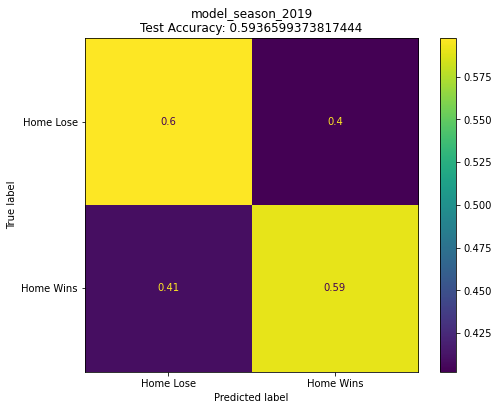

In [ ]:
df_eval = train_test_model(2019,2020,15)

In [ ]:
#df_eval_backup = df_eval
#df_eval = df_eval_backup
df_eval = df_eval.set_index('teams')
df_eval = df_eval.sort_index()
#df_eval['Average'] = df_eval.mean(axis = 1, skipna = True) 
df_eval.loc['Average',:]= df_eval.mean(axis=0)
#df_eval.loc[:,'Average']= df_eval.mean(axis=1)
#df_eval

<function matplotlib.pyplot.show>

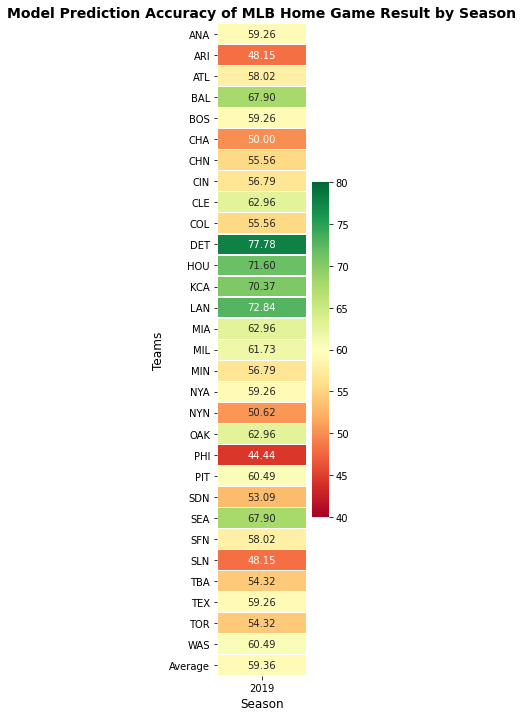

In [ ]:
fig = plt.figure(figsize = (2,12))
ax = fig.add_subplot(1,1,1) 
ax = sns.heatmap(df_eval*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=40, vmax=80)
plt.title("Model Prediction Accuracy of MLB Home Game Result by Season",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)
plt.show

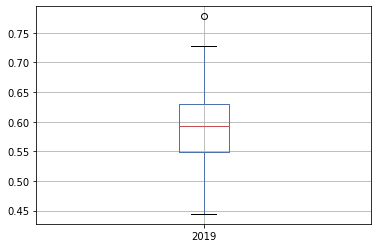

In [ ]:
df_eval.boxplot(column=[2019])

### Train models on matches of past 3 season for predicting season 2010 to 2019

MODEL NAME: model_season_2010
Epoch 00022: early stopping
Train data:  5830 	No of features: 12
Test loss:      0.6890 	Train loss:  0.6864
Test accuracy:  0.5469 	Train accu:  0.5288
Abs accuracy:   0.0181
Abs loss:       0.0026

###########################################################

MODEL NAME: model_season_2011
Epoch 00035: early stopping
Train data:  5830 	No of features: 12
Test loss:      0.6877 	Train loss:  0.6838
Test accuracy:  0.5591 	Train accu:  0.5732
Abs accuracy:   0.0142
Abs loss:       0.0038

###########################################################

MODEL NAME: model_season_2012
Epoch 00019: early stopping
Train data:  5831 	No of features: 12
Test loss:      0.6887 	Train loss:  0.6853
Test accuracy:  0.5263 	Train accu:  0.5508
Abs accuracy:   0.0245
Abs loss:       0.0034

###########################################################

MODEL NAME: model_season_2013
Epoch 00020: early stopping
Train data:  5831 	No of features: 12
Test loss:      0.6887 	Trai

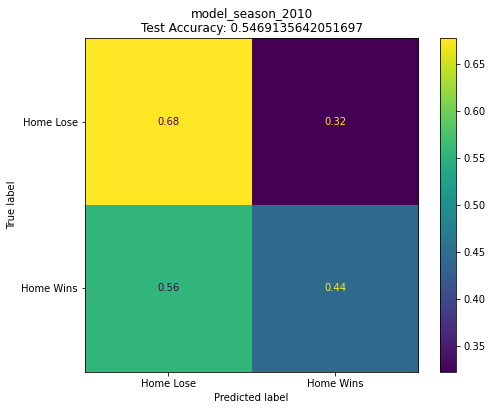

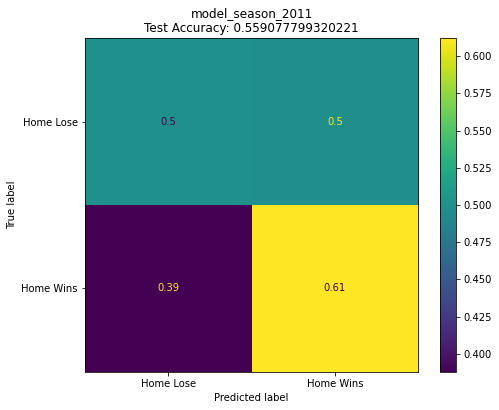

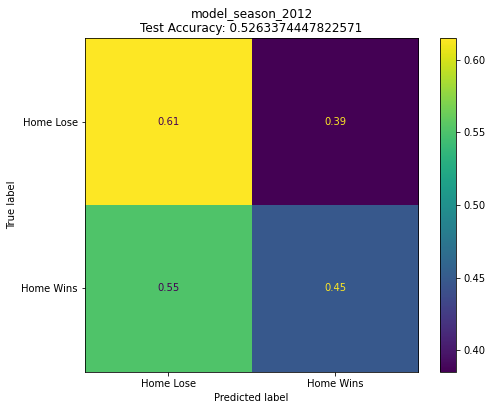

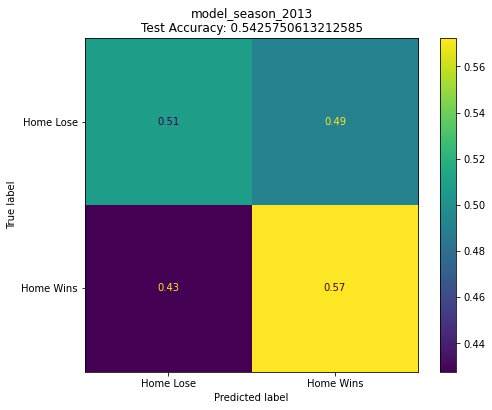

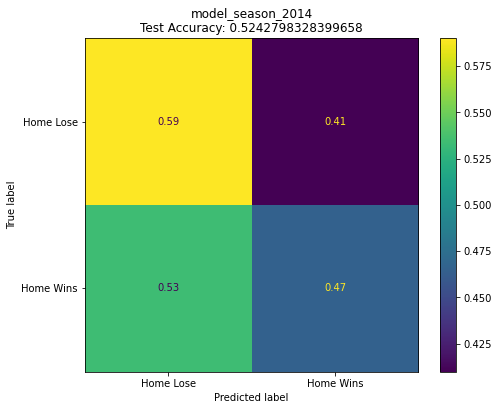

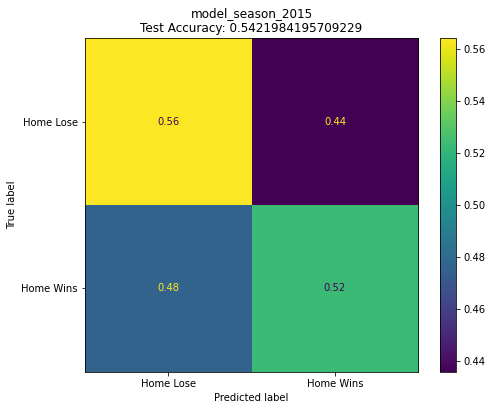

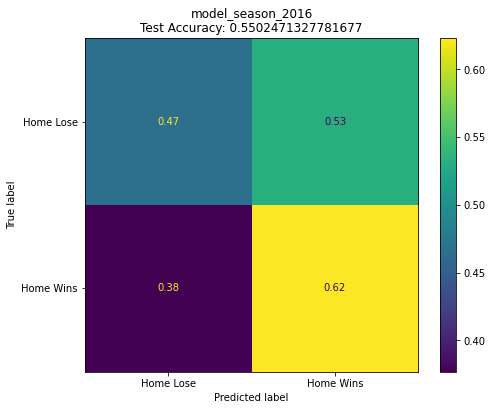

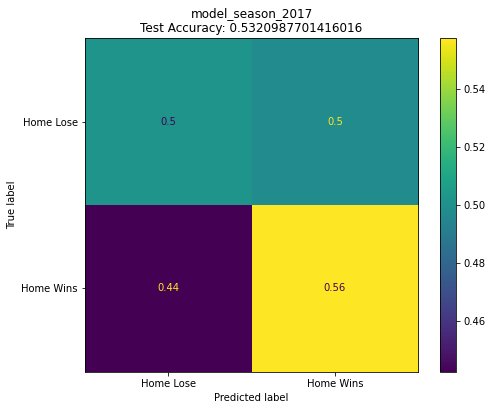

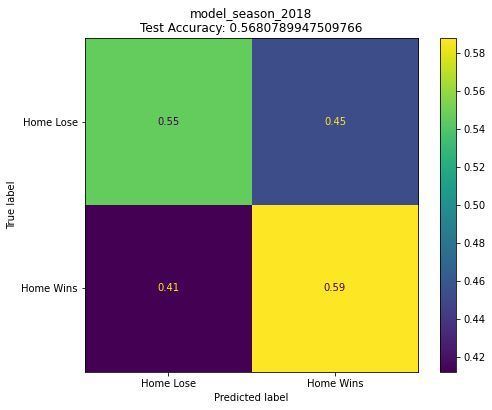

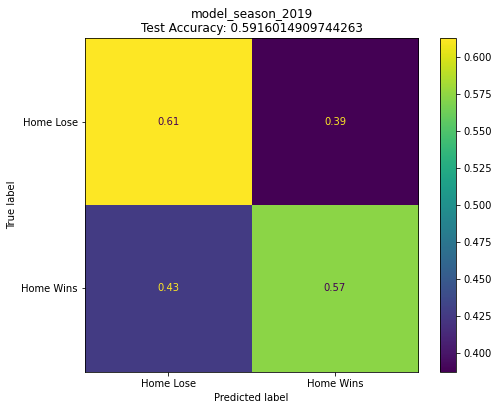

In [ ]:
df_eval = train_test_model(2010,2020,3)

In [ ]:
#df_eval_backup = df_eval
#df_eval = df_eval_backup
df_eval = df_eval.set_index('teams')
df_eval = df_eval.sort_index()
#df_eval['Average'] = df_eval.mean(axis = 1, skipna = True) 
df_eval.loc['Average',:]= df_eval.mean(axis=0)
df_eval.loc[:,'Average']= df_eval.mean(axis=1)
#df_eval

<function matplotlib.pyplot.show>

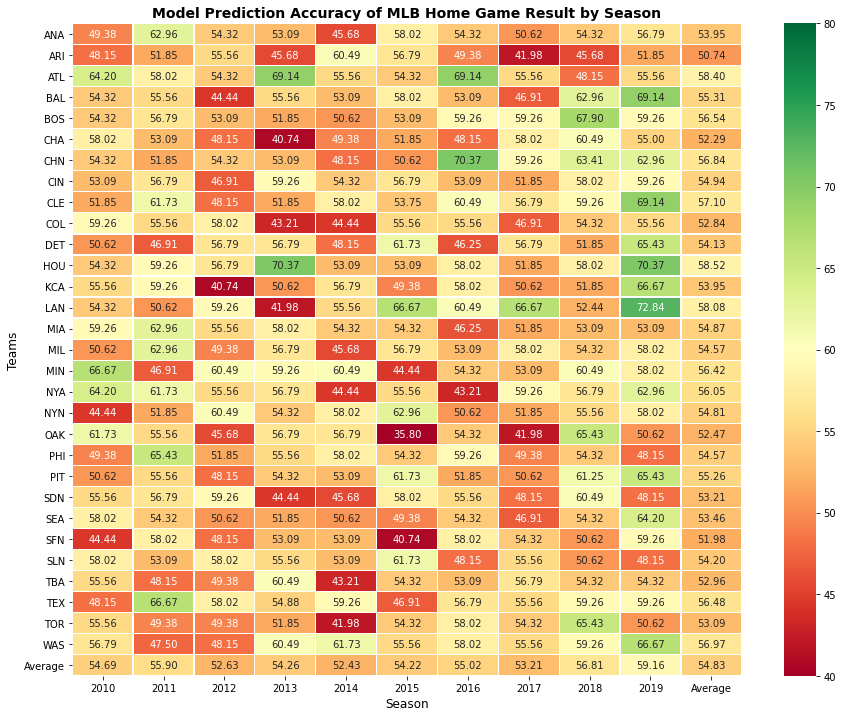

In [ ]:
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(1,1,1) 
ax = sns.heatmap(df_eval*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=40, vmax=80)
plt.title("Model Prediction Accuracy of MLB Home Game Result by Season",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)
plt.show

### Stratified Cross-fold Validation
We shall create different folds of the data with each fold containing all games of one season. The evaluation should then train the model on 9 of the folds, and test on the unseen season. This should be repeated such that all folds are the test set in turn. It is considered stratified as the proportion of home wins are approximately the same across all seasons.

MODEL NAME: model_season_2010
Epoch 00015: early stopping
Train data:  5830 	No of features: 12
Test loss:      0.6888 	Train loss:  0.6866
Test accuracy:  0.5642 	Train accu:  0.5525
Abs accuracy:   0.0117
Abs loss:       0.0022

###########################################################

MODEL NAME: model_season_2011
Epoch 00016: early stopping
Train data:  7774 	No of features: 12
Test loss:      0.6875 	Train loss:  0.6857
Test accuracy:  0.5566 	Train accu:  0.5539
Abs accuracy:   0.0027
Abs loss:       0.0018

###########################################################

MODEL NAME: model_season_2012
Epoch 00020: early stopping
Train data:  9717 	No of features: 12
Test loss:      0.6863 	Train loss:  0.6867
Test accuracy:  0.5564 	Train accu:  0.5642
Abs accuracy:   0.0078
Abs loss:       0.0003

###########################################################

MODEL NAME: model_season_2013
Epoch 00014: early stopping
Train data:  11661 	No of features: 12
Test loss:      0.6865 	Tra

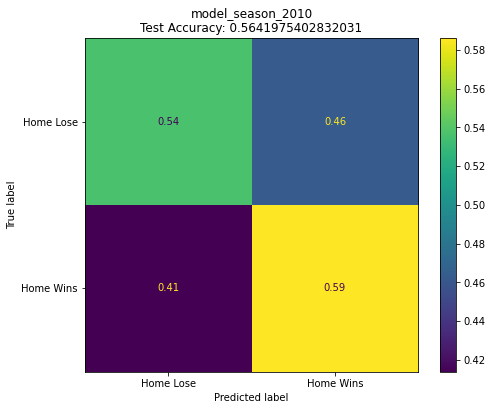

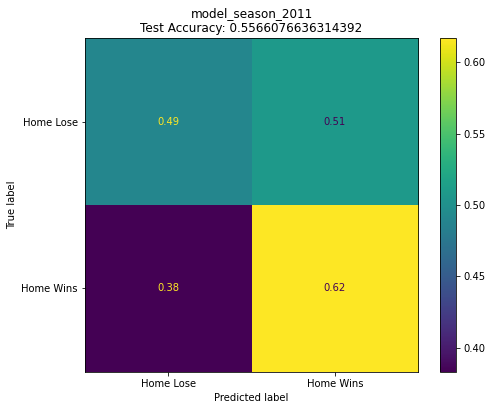

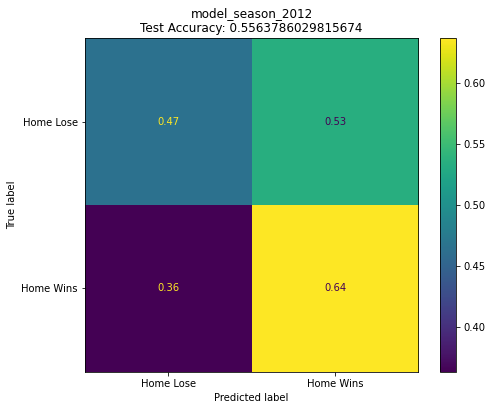

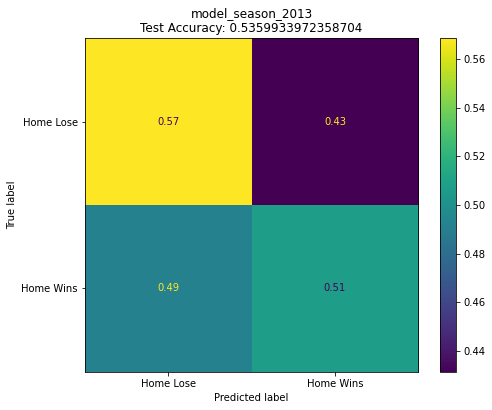

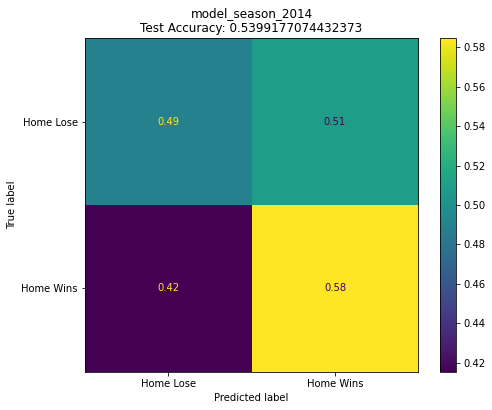

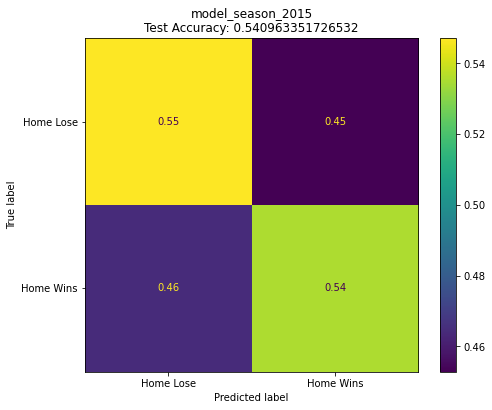

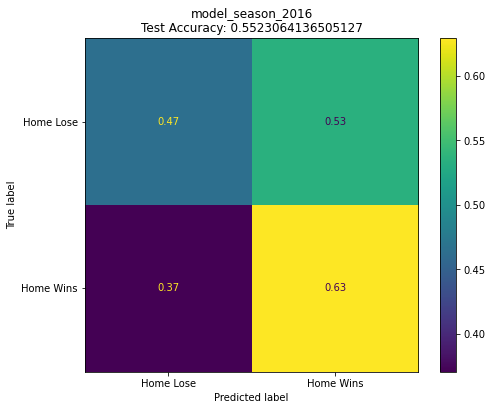

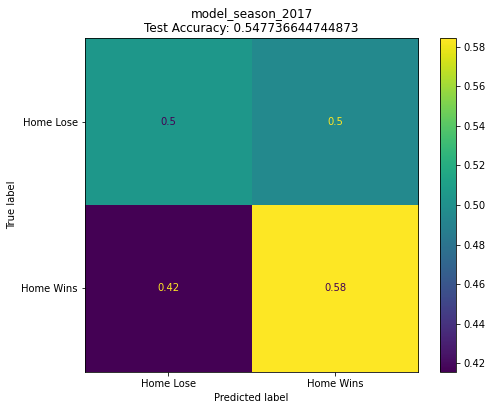

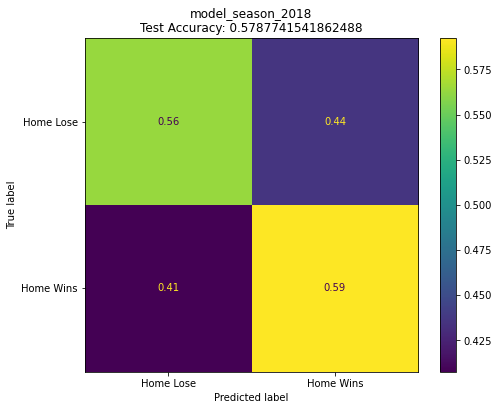

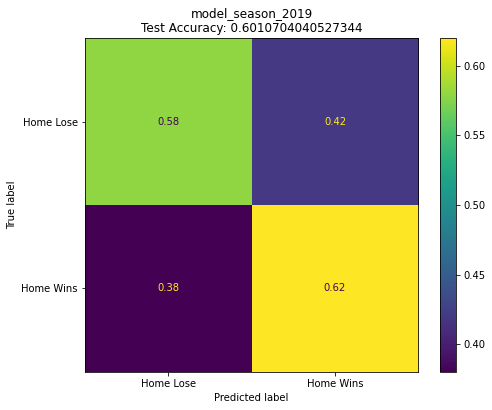

In [ ]:
df_eval = train_test_model(2010,2020,15)

In [ ]:
#df_eval_backup = df_eval
#df_eval = df_eval_backup
df_eval = df_eval.set_index('teams')
df_eval = df_eval.sort_index()
#df_eval['Average'] = df_eval.mean(axis = 1, skipna = True) 
df_eval.loc['Average',:]= df_eval.mean(axis=0)
df_eval.loc[:,'Average']= df_eval.mean(axis=1)
#df_eval

<function matplotlib.pyplot.show>

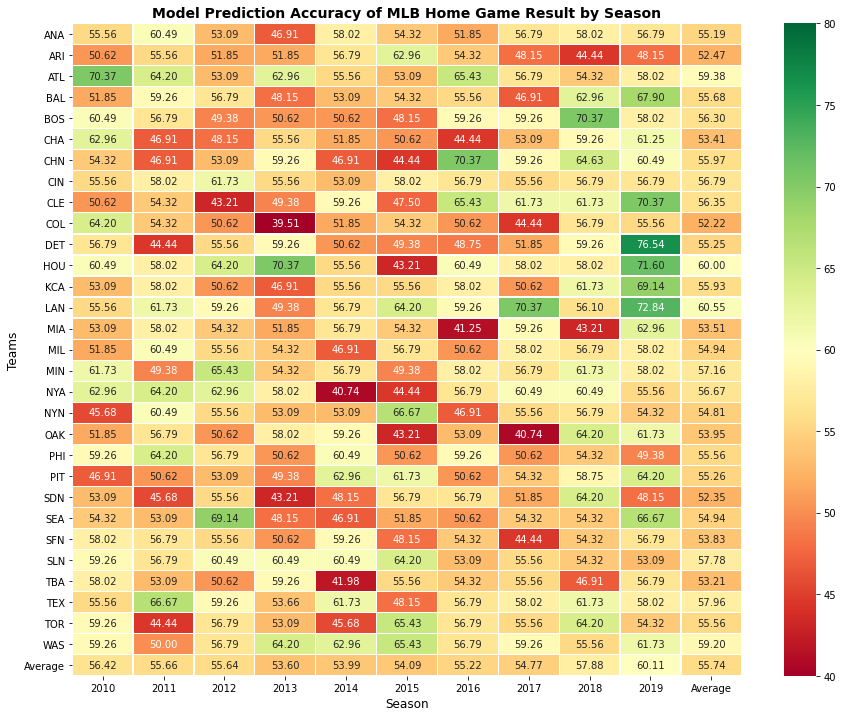

In [ ]:
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(1,1,1) 
ax = sns.heatmap(df_eval*100, annot=True, fmt=".2f", linewidths=.2, cmap="RdYlGn", vmin=40, vmax=80)
plt.title("Model Prediction Accuracy of MLB Home Game Result by Season",
                 fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize = 12)
ax.set_ylabel('Teams', fontsize = 12)
plt.show

### Other Classifiers
Just for fun...

LR 56.009% +/-1.572
KNN 51.662% +/-0.806
CART 49.658% +/-0.793


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


SVM 55.303% +/-1.283
RF 52.663% +/-0.920
GBM 55.756% +/-1.387


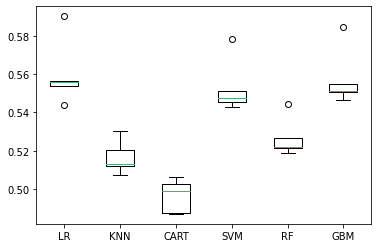

In [ ]:
# spot check for ES1
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# split into inputs and outputs
Y = np.array(pd.DataFrame(y).idxmax(1))
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	s = StandardScaler()
	p = Pipeline(steps=[('s',s), ('m',models[i])])
	scores = cross_val_score(p, X, Y, scoring='accuracy', cv=5, n_jobs=-1)
	all_scores.append(scores)
	# summarize
	m, s = mean(scores)*100, std(scores)*100
	print('%s %.3f%% +/-%.3f' % (names[i], m, s))
# plot
pyplot.boxplot(all_scores, labels=names)
pyplot.show()

# References

[1] M. Lewis, Moneyball: The Art of Winning an Unfair Game, New York: W.W. Norton & Company, 2003.  

[2] Forbes, “Baseball Team Values 2019,” 10 04 2019. [Online]. Available: https://www.forbes.com/sites/mikeozanian/2019/04/10/baseball-team-values-2019-yankees-lead-league-at-46-billion. [Accessed 13 08 2020]. 

[3] CNBC, “Major League Baseball’s new media rights deal with Turner Sports worth over $3 billion,” 15 06 2020. [Online]. Available: https://www.cnbc.com/2020/06/16/mlb-new-media-rights-deal-with-turner-sports-worth-over-3-billion.html. [Accessed 13 08 2020]. 

[4] American Gaming Association, “How Much Do Leagues Stand to Gain from Legal Sports Betting?,” 18 10 2018. [Online]. Available: https://www.americangaming.org/resources/how-much-do-leagues-stand-to-gain-from-legal-sports-betting/. [Accessed 13 08 2020]. 

[5] G. B. Costa, M. R. Huber and J. T. Saccoman, Reasoning with Sabermetrics: Applying Statistical Science to Baseball's Tough Questions, Jefferson: McFarland & Company, Inc., Publishers, 2012.  

[6] W. D. Kaigh, “Forecasting Baseball Games,” Chance, vol. 8, no. 2, pp. 33-37, 1995.  

[7] B. Baumer and A. Zimbalist, The sabermetric revolution: Assessing the growth of analytics in baseball, Philadelphia: University of Pennsylvania Press, 2014.  

[8] M. Henshon, “Big Data Baseball: Math, Miracles, and the End of a 20-Year Losing Streak,” Scitech Lawyer, vol. 12, no. 1, pp. 18-20, 2015.  

[9] T. Y. Yang and T. Swartz, “A Two-Stage Bayesian Model for Predicting Winners in Major League Baseball,” Journal of Data Science, vol. 2, pp. 61-73, 2004.  

[10] C. Soto Valero, “Predicting Win-Loss outcomes in MLB regular,” International Journal of Computer Science in Sport season games – A comparative study using data mining methods, vol. 15, no. 2, pp. 91-112, 2016.  

[11] Retrosheet, “Retrosheet,” [Online]. Available: www.retrosheet.org. 
The information used here was obtained free of charge from and is copyrighted by Retrosheet.  Interested parties may contact Retrosheet at "www.retrosheet.org".

